In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
from tqdm import tqdm

import os
import pickle
import neurokit2 as nk
plt.rcParams["figure.figsize"] = (20,10)

# Гипотеза 0: Испытуемые под воздействием внешнего раздражителя испытывают "негативные" эмоции(блок 2)

**3 блока игры, в каждом из них по 6 уровней
Во втором блоке, начиная с 3 шариков, менялась реакция смайликов на ответ респондента(вместо "правильно" они получали "неправильно" и наоборот)**

**Контроль был без обмана во втором блоке, а неправильный фидбек=неправильные смайлики**

In [2]:
def get_info(root_dir: str) -> pd.DataFrame:
    df = pd.DataFrame(columns=['Name', 'block', 'group', 'ECG', 'SGR', 'PPG', 'PPG_differential'])
    for subdir, dirs, files in tqdm(os.walk(rootdir)):
        for file in files:
            path = os.path.join(subdir, file)
            if path.endswith('.txt') and ('Vegetatics' in path):
                group = ''
                name = ''
                block = ''
                ECG = []
                SGR = []
                PPG = []
                PPG_differential = []
                if "Control" in path: 
                    group = 'Control'
                elif 'Wrong_feedback' in path:
                    group = 'Wrong_feedback'
                name = file
                block = file.split("_")[2][:-4]
                print(file)
                try:
                    regex = re.compile(r"-?[0-9][.]?[0-9]*")
                    i = 0
                    with open(path) as f:
                        for line in f:
                            if i < 47:
                                i+=1
                            else:
                                value = regex.findall(line)
                                if len(value) != 0:
                                    ECG.append(float(value[1]))
                                    SGR.append(float(value[2]))
                                    PPG.append(float(value[3]))
                                    PPG_differential.append(float(value[4]))
                                else:
                                    continue
                    f.close()
                except:
                    continue
                row = {'Name': name, 'block': block, 'group': group, 'ECG': ECG, 'SGR': SGR,'PPG': PPG,'PPG_differential': PPG_differential}
                df = df.append(row, ignore_index=True)
    return df
            

In [14]:
rootdir = r'C:\Users\fahre_000\emotion_recognition\data'

df = get_info(rootdir)

0it [00:00, ?it/s]

74_AmrVV_baseline.txt
74_AmrVV_block1.txt
74_AmrVV_block2.txt
74_AmrVV_block3.txt


9it [00:01,  6.20it/s]

74_AmrVV_training.txt
75_TroAA_baseline.txt
75_TroAA_block1.txt
75_TroAA_block2.txt
75_TroAA_block3.txt


16it [00:02,  5.47it/s]

75_TroAA_training.txt
76_MarYA_baseline.txt
76_MarYA_block1.txt
76_MarYA_block2.txt
76_MarYA_block3.txt


23it [00:04,  5.06it/s]

76_MarYA_training.txt
77_ChiAA_sl_baseline.txt
77_ChiAA_sl_block1.txt
77_ChiAA_sl_block2.txt
77_ChiAA_sl_block3.txt


30it [00:05,  5.02it/s]

77_ChiAA_sl_training.txt
78_KulSS_baseline.txt
78_KulSS_block1.txt
78_KulSS_block2.txt


39it [00:07,  5.41it/s]

78_KulSS_block3.txt
78_KulSS_training.txt
79_AntAA_baseline.txt
79_AntAA_block1.txt
79_AntAA_block2.txt
79_AntAA_block3.txt


46it [00:08,  5.19it/s]

79_AntAA_training.txt
80_SidFA_baseline.txt
80_SidFA_block1.txt
80_SidFA_block2.txt
80_SidFA_block3.txt


53it [00:10,  4.97it/s]

80_SidFA_training.txt
81_BarSR_baseline.txt
81_BarSR_block1.txt
81_BarSR_block2.txt
81_BarSR_block3.txt


60it [00:11,  4.99it/s]

81_BarSR_training.txt
82_EgoAP_baseline.txt
82_EgoAP_block1.txt
82_EgoAP_block2.txt
82_EgoAP_block3.txt


69it [00:13,  5.26it/s]

82_EgoAP_training.txt
01_MarOV_baseline.txt
01_MarOV_experiment.txt


79it [00:14,  5.88it/s]

01_MarOV_training.txt
02_GulAS_baseline.txt
02_GulAS_block1.txt
02_GulAS_block2.txt
02_GulAS_block3.txt


88it [00:16,  6.00it/s]

02_GulAS_training.txt
03_MitDG_baseline.txt
03_MitDG_block1.txt
03_MitDG_block2.txt
03_MitDG_block3.txt


97it [00:17,  6.12it/s]

03_MitDG_training.txt
04_SmiYO_baseline.txt
04_SmiYO_block1.txt
04_SmiYO_block2.txt
04_SmiYO_block3.txt


109it [00:19,  6.60it/s]

04_SmiYO_training.txt
05_SubAA_baseline.txt
05_SubAA_block1.txt
05_SubAA_block2.txt
05_SubAA_block3.txt


118it [00:20,  6.28it/s]

05_SubAA_training.txt
06_MitVG_baseline.txt
06_MitVG_block1.txt
06_MitVG_block2.txt
06_MitVG_block3.txt


127it [00:22,  6.16it/s]

06_MitVG_training.txt
07_TimYE_baseline.txt
07_TimYE_block1.txt
07_TimYE_block2.txt
07_TimYE_block3.txt


136it [00:24,  5.68it/s]

07_TimYE_training.txt
08_NekAK_baseline.txt
08_NekAK_block1.txt
08_NekAK_block2.txt
08_NekAK_block3.txt


145it [00:25,  6.01it/s]

08_NekAK_training.txt
09_AntMI_baseline.txt
09_AntMI_block1.txt
09_AntMI_block2.txt
09_AntMI_block3.txt


154it [00:26,  6.15it/s]

09_AntMI_training.txt
10_PorGV_baseline.txt
10_PorGV_block1.txt
10_PorGV_block2.txt
10_PorGV_block3.txt


163it [00:28,  6.22it/s]

10_PorGV_training.txt
11_MasAV_baseline.txt
11_MasAV_block1.txt
11_MasAV_block2.txt
11_MasAV_block3.txt


172it [00:29,  6.40it/s]

11_MasAV_training.txt
12_AlsGA_baseline.txt
12_AlsGA_block1.txt
12_AlsGA_block2.txt
12_AlsGA_block3.txt


181it [00:30,  6.39it/s]

12_AlsGA_training.txt
13_SneOP_baseline.txt
13_SneOP_block1.txt
13_SneOP_block2.txt
13_SneOP_block3.txt


190it [00:32,  6.34it/s]

13_SneOP_training.txt
14_GaiMR_baseline.txt
14_GaiMR_block1.txt
14_GaiMR_block2.txt
14_GaiMR_block3.txt


199it [00:33,  6.25it/s]

14_GaiMR_training.txt
15_ProNI_baseline.txt
15_ProNI_block1.txt
15_ProNI_block2.txt
15_ProNI_block3.txt


208it [00:35,  5.60it/s]

15_ProNI_training.txt
16_StoIA_baseline.txt
16_StoIA_block1.txt
16_StoIA_block2.txt
16_StoIA_block3.txt


217it [00:37,  5.86it/s]

16_StoIA_training.txt
17_LeoAD_baseline.txt
17_LeoAD_block1.txt
17_LeoAD_block2.txt
17_LeoAD_block3.txt


226it [00:38,  5.91it/s]

17_LeoAD_training.txt
18_MazAA_baseline.txt
18_MazAA_block1.txt
18_MazAA_block2.txt
18_MazAA_block3.txt


235it [00:40,  5.78it/s]

18_MazAA_training.txt
19_GeiEA_baseline.txt
19_GeiEA_block1.txt
19_GeiEA_block2.txt
19_GeiEA_block3.txt


244it [00:41,  5.78it/s]

19_GeiEA_training.txt
20_PavSO_baseline.txt
20_PavSO_block1.txt


258it [00:42,  7.85it/s]

20_PavSO_training.txt
20_PavSO2_baseline.txt
21_MilSG_baseline.txt
21_MilSG_block1.txt
21_MilSG_block2.txt
21_MilSG_block3.txt


267it [00:44,  6.98it/s]

21_MilSG_training.txt
22_SteVR_baseline.txt
22_SteVR_block1.txt
22_SteVR_block2.txt
22_SteVR_block3.txt


276it [00:45,  6.93it/s]

22_SteVR_training.txt
23_DoiNA_baseline.txt
23_DoiNA_block1.txt
23_DoiNA_block2.txt
23_DoiNA_block3.txt


285it [00:47,  6.59it/s]

23_DoiNA_training.txt
24_KudDY_baseline.txt
24_KudDY_block1.txt
24_KudDY_block2.txt
24_KudDY_block3.txt


294it [00:48,  6.48it/s]

24_KudDY_training.txt
25_TihYA_baseline.txt
25_TihYA_block1.txt
25_TihYA_block2.txt
25_TihYA_block3.txt


306it [00:49,  7.01it/s]

25_TihYA_training.txt
26_IboSN_baseline.txt
26_IboSN_block1.txt
26_IboSN_block2.txt
26_IboSN_block3.txt


315it [00:51,  6.53it/s]

26_IboSN_training.txt
27_IvaVV_baseline.txt
27_IvaVV_block1.txt
27_IvaVV_block2.txt
27_IvaVV_block3.txt


324it [00:53,  6.25it/s]

27_IvaVV_training.txt
28_TumNY_baseline.txt
28_TumNY_block1.txt
28_TumNY_block2.txt
28_TumNY_block3.txt


333it [00:54,  6.21it/s]

28_TumNY_training.txt
29_ZelAS_baseline.txt
29_ZelAS_block1.txt
29_ZelAS_block2.txt
29_ZelAS_block3.txt


342it [00:55,  6.31it/s]

29_ZelAS_training.txt
30_GalSK_baseline.txt
30_GalSK_block1.txt
30_GalSK_block2.txt
30_GalSK_block3.txt


351it [00:57,  6.41it/s]

30_GalSK_training.txt
31_BurAV_baseline.txt
31_BurAV_block1.txt
31_BurAV_block2.txt
31_BurAV_block3.txt


360it [00:58,  6.28it/s]

31_BurAV_training.txt
32_KulDS_baseline.txt
32_KulDS_block1.txt
32_KulDS_block2.txt
32_KulDS_block3.txt


372it [01:00,  6.85it/s]

32_KulDS_training.txt
34_BarEA_baseline.txt
34_BarEA_block1.txt
34_BarEA_block2.txt
34_BarEA_block3.txt


381it [01:01,  6.55it/s]

34_BarEA_training.txt
35_KalEY_baseline.txt
35_KalEY_block1.txt
35_KalEY_block2.txt
35_KalEY_block3.txt


390it [01:03,  6.57it/s]

35_KalEY_training.txt
36_SarMA_baseline.txt
36_SarMA_block1.txt
36_SarMA_block2.txt
36_SarMA_block3.txt


399it [01:04,  6.41it/s]

37_KirDA_baseline.txt
37_KirDA_block1.txt
37_KirDA_block2.txt
37_KirDA_block3.txt


408it [01:06,  6.37it/s]

37_KirDA_training.txt
38_TolDI_baseline.txt
38_TolDI_block1.txt
38_TolDI_block2.txt
38_TolDI_block3.txt


417it [01:07,  6.27it/s]

38_TolDI_training.txt
39_RosSM_baseline.txt
39_RosSM_block1.txt
39_RosSM_block2.txt
39_RosSM_block3.txt


426it [01:09,  6.01it/s]

39_RosSM_training.txt
40_NemMS_baseline.txt
40_NemMS_block1.txt
40_NemMS_block2.txt
40_NemMS_block3.txt


435it [01:10,  6.14it/s]

40_NemMS_training.txt
41_IotMY_baseline.txt
41_IotMY_block1.txt
41_IotMY_block2.txt
41_IotMY_block3.txt


444it [01:12,  5.55it/s]

41_IotMY_training.txt
42_AsiDI_baseline.txt
42_AsiDI_block1.txt
42_AsiDI_block2.txt
42_AsiDI_block3.txt
42_AsiDI_training.txt
42_AsiDI_training1.txt


456it [01:14,  5.78it/s]

42_AsiDI_training2.txt
43_KorMN_baseline.txt
43_KorMN_block1.txt
43_KorMN_block2.txt
43_KorMN_block3.txt


465it [01:15,  6.10it/s]

43_KorMN_training.txt
44_TseSA_baseline.txt
44_TseSA_block1.txt
44_TseSA_block2.txt
44_TseSA_block3.txt


474it [01:17,  6.10it/s]

44_TseSA_training.txt
45_GibGR_baseline.txt
45_GibGR_block1.txt
45_GibGR_block2.txt
45_GibGR_block3.txt


483it [01:18,  6.18it/s]

45_GibGR_training.txt
46_LodAV_baseline.txt
46_LodAV_block1.txt
46_LodAV_block2.txt
46_LodAV_block3.txt


492it [01:20,  6.22it/s]

46_LodAV_training.txt
47_KozVA_baseline.txt
47_KozVA_block1.txt
47_KozVA_block2.txt
47_KozVA_block3.txt


501it [01:21,  6.29it/s]

47_KozVA_training.txt
48_SyaEG_baseline.txt
48_SyaEG_block1.txt
48_SyaEG_block2.txt
48_SyaEG_block3.txt


510it [01:22,  6.41it/s]

48_SyaEG_training.txt
49_SteDI_baseline.txt
49_SteDI_block1.txt
49_SteDI_block2.txt
49_SteDI_block3.txt


519it [01:24,  6.38it/s]

49_SteDI_training.txt
50_NikAO_baseline.txt
50_NikAO_block1.txt
50_NikAO_block2.txt
50_NikAO_block3.txt


528it [01:25,  6.49it/s]

50_NikAO_training.txt
51_VolAR_baseline.txt
51_VolAR_block1.txt
51_VolAR_block2.txt
51_VolAR_block3.txt


537it [01:27,  6.41it/s]

51_VolAR_training.txt
52_StePI_baseline.txt
52_StePI_block1.txt
52_StePI_block2.txt
52_StePI_block3.txt


546it [01:28,  6.36it/s]

52_StePI_training.txt
53_BabYV_baseline.txt
53_BabYV_block1.txt
53_BabYV_block2.txt
53_BabYV_block3.txt


555it [01:29,  6.31it/s]

53_BabYV_training.txt
54_KosPV_baseline.txt
54_KosPV_block1.txt
54_KosPV_block2.txt
54_KosPV_block3.txt


564it [01:31,  6.11it/s]

54_KosPV_training.txt
55_ElcRD_baseline.txt
55_ElcRD_block1.txt
55_ElcRD_block2.txt
55_ElcRD_block3.txt


573it [01:32,  6.14it/s]

55_ElcRD_training.txt
56_ButAS_baseline.txt
56_ButAS_block1.txt
56_ButAS_block2.txt
56_ButAS_block3.txt


582it [01:34,  6.11it/s]

56_ButAS_training.txt
57_GlaNA_baseline.txt
57_GlaNA_block1.txt
57_GlaNA_block2.txt
57_GlaNA_block3.txt


591it [01:35,  6.14it/s]

57_GlaNA_training.txt
58_DavAS_baseline.txt
58_DavAS_block1.txt
58_DavAS_block2.txt
58_DavAS_block3.txt


603it [01:37,  6.83it/s]

58_DavAS_training.txt
59_ZolAI_baseline.txt
59_ZolAI_block1.txt
59_ZolAI_block2.txt
59_ZolAI_block3.txt


612it [01:38,  6.56it/s]

59_ZolAI_training.txt
66_UskNA_baseline.txt
66_UskNA_block1.txt
66_UskNA_block2.txt
66_UskNA_block3.txt


675it [01:40, 17.72it/s]

66_UskNA_training.txt
67_UskDA_baseline.txt
67_UskDA_block1.txt
67_UskDA_block2.txt
67_UskDA_block3.txt


684it [01:41, 14.08it/s]

67_UskDA_training.txt
68_FedYA_baseline.txt
68_FedYA_block1.txt
68_FedYA_block2.txt
68_FedYA_block3.txt


693it [01:43, 11.35it/s]

68_FedYA_training.txt
69_SteKO_baseline.txt
69_SteKO_block1.txt
69_SteKO_block2.txt
69_SteKO_block3.txt


702it [01:44,  9.53it/s]

69_SteKO_training.txt
70_TimSD_baseline.txt
70_TimSD_block1.txt
70_TimSD_block2.txt
70_TimSD_block3.txt


711it [01:46,  8.62it/s]

70_TimSD_training.txt
71_KruIA_baseline.txt
71_KruIA_block1.txt
71_KruIA_block3.txt


720it [01:47,  8.36it/s]

71_KruIA_training.txt
72_PavMA_baseline.txt
72_PavMA_block1.txt
72_PavMA_block2.txt
72_PavMA_block3.txt


729it [01:49,  6.63it/s]

72_PavMA_training.txt
73_AntEG_baseline.txt
73_AntEG_block1.txt
73_AntEG_block2.txt
73_AntEG_block3.txt


738it [01:51,  6.64it/s]

73_AntEG_training.txt


In [22]:
df.to_pickle('df.pkl') 

In [30]:
with open('df.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
def sep_by_levels(df : pd.DataFrame) -> pd.DataFrame:
    
    new_df = pd.DataFrame(columns=['Name', 'block', 'group', 'ECG', 'SGR', 'PPG', 'PPG_differential', 'length'])
    
    for i in tqdm(range(len(df))):
        if df['block'][i] == 'baseline' or df['block'][i] == 'training':
            row = {'Name': df['Name'][i], 'block': df['block'][i], 'group': df['group'][i], 'ECG': df['ECG'][i], 'SGR': df['SGR'][i], 'PPG': df['PPG'][i],'PPG_differential': df['PPG_differential'][i], 'length' : len(df['ECG'][i])}
            new_df = new_df.append(row, ignore_index=True)
            
        else:
            part = len(df['ECG'][i])//6
            level1 = [df['ECG'][i][:part],df['SGR'][i][:part], df['PPG'][i][:part], df['PPG_differential'][i][:part]] 
            level2 = [df['ECG'][i][part:part*2],df['SGR'][i][part:part*2], df['PPG'][i][part:part*2], df['PPG_differential'][i][part:part*2]]
            level3 = [df['ECG'][i][part*2:part*3],df['SGR'][i][part*2:part*3], df['PPG'][i][part*2:part*3],df['PPG_differential'][i][part*2:part*3]]
            level4 = [df['ECG'][i][part*3:part*4],df['SGR'][i][part*3:part*4],df['PPG'][i][part*3:part*4],df['PPG_differential'][i][part*3:part*4]]
            level5 = [df['ECG'][i][part*4:part*5],df['SGR'][i][part*4:part*5],df['PPG'][i][part*4:part*5],df['PPG_differential'][i][part*4:part*5]]
            level6 = [df['ECG'][i][part*5:part*6],df['SGR'][i][part*5:part*6],df['PPG'][i][part*5:part*6],df['PPG_differential'][i][part*5:part*6]]
            levels = [level1,level2,level3,level4,level5,level6]
            for j in range(len(levels)):
                row = {'Name': df['Name'][i], 'block': df['block'][i] + '_level'+str(j+1), 'group': df['group'][i], 'ECG': levels[j][0], 'SGR': levels[j][1], 'PPG': levels[j][2], 'PPG_differential': levels[j][3], 'length' : len(levels[j][0])}
                new_df = new_df.append(row, ignore_index=True)
    return new_df
            
        

In [32]:
df = sep_by_levels(df)

100%|████████████████████████████████████████████████████████████████████████████████| 371/371 [00:07<00:00, 50.16it/s]


In [2]:
with open('df_sep.pkl', 'rb') as f:
    df = pickle.load(f)

In [5]:
for n in df[df.group == 'Wrong_feedback']['Name']:
    print(n)

01_MarOV_baseline.txt
01_MarOV_experiment.txt
01_MarOV_experiment.txt
01_MarOV_experiment.txt
01_MarOV_experiment.txt
01_MarOV_experiment.txt
01_MarOV_experiment.txt
01_MarOV_training.txt
02_GulAS_baseline.txt
02_GulAS_block1.txt
02_GulAS_block1.txt
02_GulAS_block1.txt
02_GulAS_block1.txt
02_GulAS_block1.txt
02_GulAS_block1.txt
02_GulAS_block2.txt
02_GulAS_block2.txt
02_GulAS_block2.txt
02_GulAS_block2.txt
02_GulAS_block2.txt
02_GulAS_block2.txt
02_GulAS_block3.txt
02_GulAS_block3.txt
02_GulAS_block3.txt
02_GulAS_block3.txt
02_GulAS_block3.txt
02_GulAS_block3.txt
02_GulAS_training.txt
03_MitDG_baseline.txt
03_MitDG_block1.txt
03_MitDG_block1.txt
03_MitDG_block1.txt
03_MitDG_block1.txt
03_MitDG_block1.txt
03_MitDG_block1.txt
03_MitDG_block2.txt
03_MitDG_block2.txt
03_MitDG_block2.txt
03_MitDG_block2.txt
03_MitDG_block2.txt
03_MitDG_block2.txt
03_MitDG_block3.txt
03_MitDG_block3.txt
03_MitDG_block3.txt
03_MitDG_block3.txt
03_MitDG_block3.txt
03_MitDG_block3.txt
03_MitDG_training.txt
04_S

In [79]:
tmp = df[df['Name'].str.contains("MitVG")]
tmp = tmp.reset_index(drop = True)

In [80]:
tmp

,Name,block,group,ECG,SGR,PPG,PPG_differential,length
0,06_MitVG_baseline.txt,baseline,Wrong_feedback,"[-0.0335, -0.02725, -0.03125, -0.03025, -0.019...","[-0.495911, -0.497437, -0.497437, -0.498962, -...","[0.4675, 0.450625, 0.43125, 0.408125, 0.3825, ...","[-3.9875, -4.725, -5.5125, -6.3, -7.0875, -7.8...",30165
1,06_MitVG_block1.txt,block1_level1,Wrong_feedback,"[0.029, 0.00175, 0.00375, 0.01725, -0.004, -0....","[1.57928, 1.57623, 1.57166, 1.5686, 1.56555, 1...","[0.39375, 0.384375, 0.374375, 0.364375, 0.3537...","[-2.375, -2.4875, -2.6, -2.7125, -2.825, -2.92...",18782
2,06_MitVG_block1.txt,block1_level2,Wrong_feedback,"[-0.12375, -0.101, -0.09725, -0.10225, -0.0935...","[-0.0808716, -0.0823975, -0.0839233, -0.085449...","[0.300625, 0.2925, 0.2825, 0.27125, 0.259375, ...","[-1.8875, -2.3625, -2.7375, -2.9875, -3.125, -...",18782
3,06_MitVG_block1.txt,block1_level3,Wrong_feedback,"[0.02875, 0.04575, 0.106, 0.16325, 0.162, 0.14...","[-0.158691, -0.158691, -0.157166, -0.157166, -...","[-0.336875, -0.326875, -0.315625, -0.30375, -0...","[2.3125, 2.7375, 3.0125, 3.15, 3.15, 3.0, 2.72...",18782
4,06_MitVG_block1.txt,block1_level4,Wrong_feedback,"[-0.03175, -0.076, -0.09425, -0.05925, -0.0422...","[0.170898, 0.17395, 0.177002, 0.178528, 0.1815...","[-0.189375, -0.198125, -0.208125, -0.22, -0.23...","[-2.125, -2.4625, -2.8, -3.1, -3.325, -3.475, ...",18782
5,06_MitVG_block1.txt,block1_level5,Wrong_feedback,"[0.09875, 0.077, 0.0415, 0.0635, 0.08975, 0.07...","[-0.332642, -0.331116, -0.32959, -0.32959, -0....","[0.33375, 0.32875, 0.32125, 0.3125, 0.3025, 0....","[-0.8125, -1.575, -2.1125, -2.4375, -2.6, -2.5...",18782
6,06_MitVG_block1.txt,block1_level6,Wrong_feedback,"[0.25225, 0.0895, -0.04525, -0.146, -0.1965, -...","[0.00152588, 0.00152588, 0.0, 0.0, 0.0, -0.001...","[-0.58125, -0.58875, -0.59625, -0.60375, -0.61...","[-2.1, -1.9625, -1.9625, -2.1125, -2.3625, -2....",18782
7,06_MitVG_block2.txt,block2_level1,Wrong_feedback,"[0.05825, 0.0505, 0.048, 0.054, 0.055, 0.0505,...","[2.4765, 2.47803, 2.48108, 2.48413, 2.48566, 2...","[-0.4725, -0.476875, -0.481875, -0.488125, -0....","[-0.875, -1.2375, -1.4875, -1.625, -1.6375, -1...",18677
8,06_MitVG_block2.txt,block2_level2,Wrong_feedback,"[-0.02275, -0.0255, -0.02375, -0.01875, -0.017...","[3.01056, 3.01514, 3.01971, 3.02277, 3.02734, ...","[0.715625, 0.675625, 0.63375, 0.589375, 0.5425...","[-9.8875, -10.0, -11.0, -11.0, -12.0, -12.0, -...",18677
9,06_MitVG_block2.txt,block2_level3,Wrong_feedback,"[-0.043, -0.04875, -0.05175, -0.047, -0.04075,...","[-0.448608, -0.450134, -0.450134, -0.45166, -0...","[-0.0675, -0.070625, -0.07125, -0.069375, -0.0...","[-1.075, -0.4875, 0.125, 0.7375, 1.3125, 1.812...",18677


In [204]:
def rr_interval(ecg):
    
    """This function takes ECG and returns RR intervals"""
    
    ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250)
    rpeaks, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=250, correct_artifacts=True)
    time_diff = []
    for i in range(len(info['ECG_R_Peaks'])):
        if i == len(info['ECG_R_Peaks'])-1:
            break
        else:
            time_diff.append(info['ECG_R_Peaks'][i+1] - info['ECG_R_Peaks'][i])
    return time_diff, info

In [82]:
def get_plots(df):
    for i in range(len(df)):
        ecg = df["ECG"][i]
        ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250)
        rpeaks, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=250, correct_artifacts=True)
        hrv_features = nk.hrv_time(rpeaks)
        mean_baseline = hrv_features['HRV_MeanNN'][0]
        print(df['block'][i], 'Mean : ',mean_baseline)
        test = rr_interval(df["ECG"][i])
        plt.plot(test)
        plt.title(df['block'][i])
        plt.ylim(100,300)
        plt.savefig("plots/{}.png".format(df['block'][i]), dpi = 300)
        plt.close()

In [117]:
ecg = tmp["ECG"][0]

In [118]:
ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250)

In [119]:
signals, info = nk.ecg_process(ecg_cleaned, sampling_rate=250, method = 'neurokit')

In [141]:
signals

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,-0.003140,-0.007609,104.906479,0.956772,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,-0.013040,-0.015432,104.906479,0.956772,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,-0.020950,-0.022672,104.906479,0.956772,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,-0.027219,-0.028936,104.906479,0.956772,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,-0.033129,-0.034001,104.906479,0.956772,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18777,0.017610,0.017232,94.936709,0.906744,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
18778,0.011453,0.012053,94.936709,0.906744,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
18779,0.005230,0.006352,94.936709,0.906744,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
18780,-0.001407,0.000315,94.936709,0.906744,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


# P WAVE

In [146]:
for i in range(1000):
    if signals['ECG_P_Peaks'][i] == 1:
        print(i)

215
379
542
707
864


In [153]:
for i in range(1000):
    if signals['ECG_P_Offsets'][i] == 1:
        print(i)

224
386
551
715
874


In [151]:
for i in range(1000):
    if signals['ECG_P_Onsets'][i] == 1:
        print(i)

207
363
530
700
851


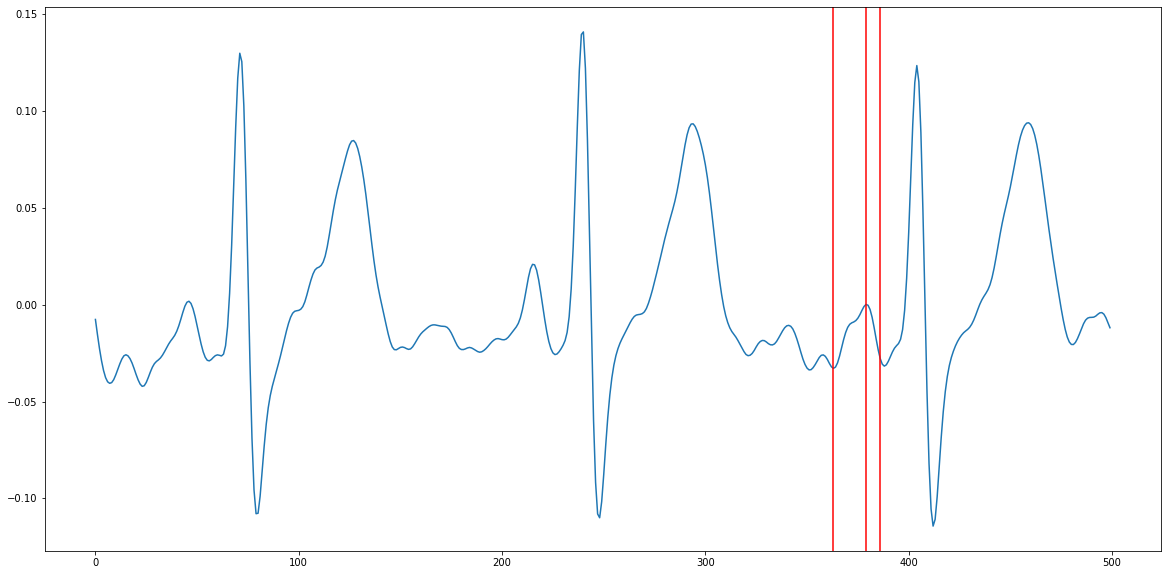

In [156]:
plt.plot(signals['ECG_Clean'][0:500])
plt.axvline(x=379, color='r')
plt.axvline(x=386, color='r')
plt.axvline(x=363, color='r')

# SGR

In [160]:
def moving_average(a, n=1250) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

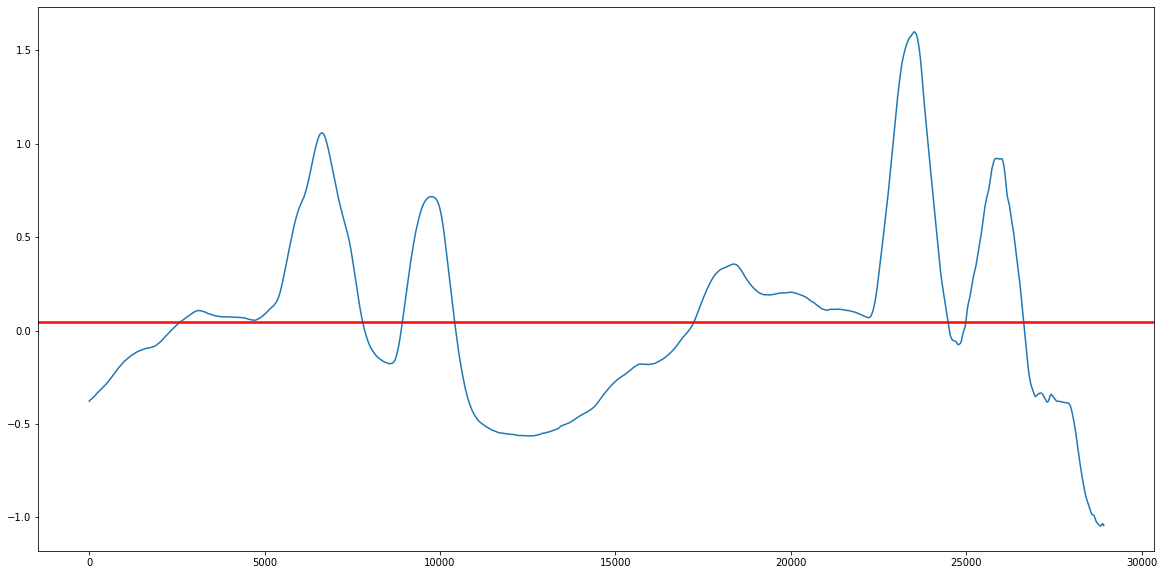

In [161]:
plt.plot(moving_average(tmp['SGR'][0]))
plt.axhline(y=np.mean(tmp['SGR'][0]), color='r', linestyle='-')
plt.axhline(y=np.mean(tmp['SGR'][0])*1.2, color='r', linestyle='-')

In [179]:
len(tmp['SGR'][0])

30165

In [164]:
sgr_data_filtered = moving_average(tmp['SGR'][0])

In [172]:
sgr_derivative = np.gradient(sgr_data_filtered)

In [174]:
sgr_increases = np.where(sgr_derivative > 0)[0]
sgr_decreases = np.where(sgr_derivative < 0)[0]

In [175]:
sgr_increases

array([    0,     1,     2, ..., 28883, 28884, 28885], dtype=int64)

In [176]:
sgr_decreases

array([ 3126,  3127,  3128, ..., 28913, 28914, 28915], dtype=int64)

In [182]:
time = np.arange(30165)
time

array([    0,     1,     2, ..., 30162, 30163, 30164])

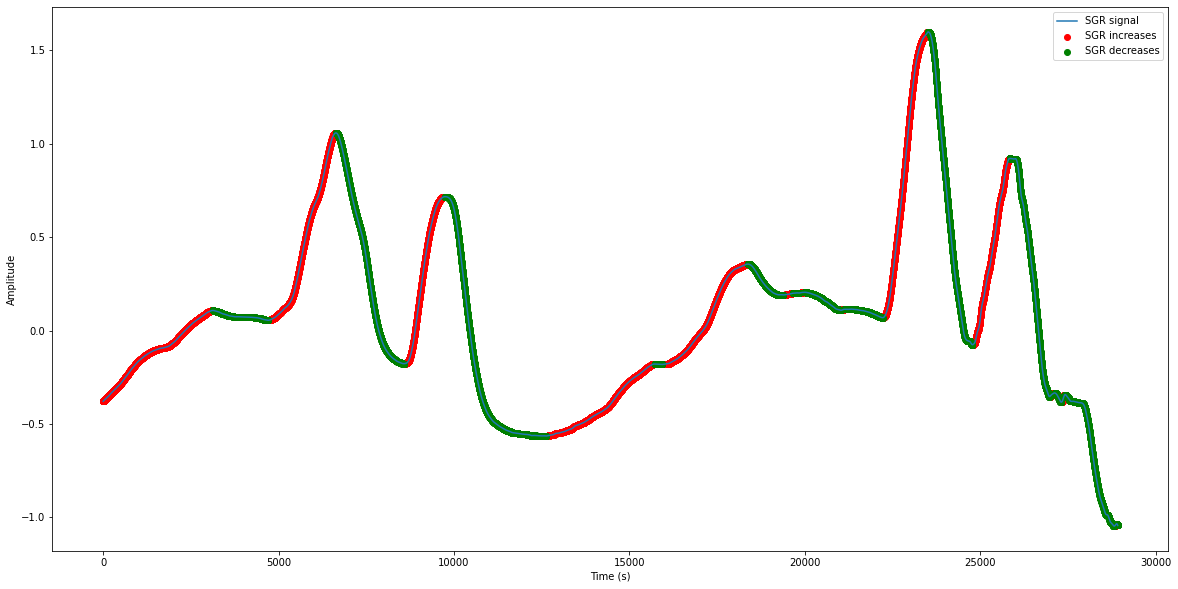

In [184]:
plt.plot(sgr_data_filtered, label='SGR signal')
plt.scatter(time[sgr_increases], sgr_data_filtered[sgr_increases], c='r', label='SGR increases')
plt.scatter(time[sgr_decreases], sgr_data_filtered[sgr_decreases], c='g', label='SGR decreases')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# RR

In [121]:
hrv_features = nk.hrv_time(signals['ECG_R_Peaks'])
mean_baseline = hrv_features['HRV_MeanNN'][0]
std_baseline = hrv_features['HRV_SDNN'][0]
print(mean_baseline)

175.12280701754386


In [123]:
mean_hr = np.mean(signals['ECG_Rate'])
mean_hr

85.6562018873545

In [ ]:
# plt.plot(ecg_cleaned)

# xcoords = info['ECG_R_Peaks']
# for xc in xcoords:
#     plt.axvline(x=xc, color='r')
# plt.show()

In [146]:
def divide_chunks(l, n):
     
    # looping till length l
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [241]:
# ecg = df["ECG"][1]
# ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250)
# rpeaks, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=250, correct_artifacts=True)

In [205]:
rr_intervals, info = rr_interval(tmp["ECG"][1])

In [217]:
signals, info = nk.ecg_process(nk.ecg_clean(tmp["ECG"][0], sampling_rate=250), sampling_rate=250, method = 'neurokit')

In [211]:
signals

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,-0.003140,-0.007609,104.906479,0.956772,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,-0.013040,-0.015432,104.906479,0.956772,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,-0.020950,-0.022672,104.906479,0.956772,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,-0.027219,-0.028936,104.906479,0.956772,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,-0.033129,-0.034001,104.906479,0.956772,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18777,0.017610,0.017232,94.936709,0.906744,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
18778,0.011453,0.012053,94.936709,0.906744,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
18779,0.005230,0.006352,94.936709,0.906744,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
18780,-0.001407,0.000315,94.936709,0.906744,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


In [219]:
amplitude = []
for i in range(len(signals.index[signals['ECG_R_Peaks'] == 1].tolist())):
    amplitude.append(signals.index[signals['ECG_P_Offsets'] == 1].tolist()[i] - signals.index[signals['ECG_P_Onsets'] == 1].tolist()[i])
    
np.mean(amplitude)

22.267441860465116

In [221]:
amplitude

[25,
 21,
 26,
 28,
 15,
 16,
 25,
 13,
 18,
 16,
 12,
 26,
 23,
 17,
 29,
 18,
 26,
 17,
 23,
 32,
 26,
 38,
 25,
 17,
 24,
 26,
 27,
 23,
 18,
 21,
 25,
 26,
 31,
 23,
 13,
 26,
 17,
 18,
 30,
 25,
 25,
 25,
 16,
 30,
 24,
 29,
 19,
 25,
 22,
 25,
 24,
 14,
 29,
 27,
 23,
 19,
 31,
 27,
 21,
 24,
 26,
 16,
 21,
 26,
 12,
 29,
 28,
 23,
 33,
 22,
 26,
 28,
 28,
 16,
 27,
 23,
 30,
 21,
 24,
 23,
 24,
 27,
 16,
 28,
 24,
 23,
 13,
 23,
 12,
 16,
 26,
 15,
 31,
 24,
 24,
 18,
 27,
 26,
 24,
 25,
 19,
 12,
 16,
 27,
 22,
 10,
 24,
 26,
 24,
 21,
 26,
 20,
 24,
 34,
 13,
 21,
 15,
 19,
 20,
 21,
 31,
 16,
 29,
 9,
 20,
 23,
 23,
 21,
 16,
 28,
 10,
 28,
 12,
 24,
 17,
 19,
 24,
 28,
 23,
 28,
 15,
 18,
 22,
 23,
 16,
 14,
 35,
 21,
 25,
 11,
 15,
 14,
 29,
 25,
 29,
 20,
 27,
 27,
 17,
 20,
 28,
 14,
 14,
 25,
 27,
 14,
 16,
 25,
 14,
 24,
 25,
 26]

In [210]:
signals.index[signals['ECG_R_Peaks'] == 1].tolist()

[240,
 404,
 569,
 733,
 890,
 1047,
 1202,
 1353,
 1505,
 1662,
 1820,
 1975,
 2130,
 2280,
 2421,
 2563,
 2716,
 2869,
 3017,
 3171,
 3325,
 3466,
 3613,
 3761,
 3909,
 4049,
 4191,
 4332,
 4468,
 4605,
 4747,
 4888,
 5020,
 5152,
 5285,
 5419,
 5552,
 5689,
 5824,
 5956,
 6086,
 6220,
 6358,
 6493,
 6625,
 6756,
 6886,
 7012,
 7139,
 7267,
 7394,
 7518,
 7641,
 7764,
 7887,
 8009,
 8130,
 8253,
 8376,
 8496,
 8616,
 8736,
 8859,
 8982,
 9105,
 9227,
 9350,
 9472,
 9596,
 9722,
 9855,
 9995,
 10129,
 10264,
 10401,
 10537,
 10669,
 10803,
 10936,
 11068,
 11198,
 11331,
 11467,
 11595,
 11724,
 11855,
 11992,
 12132,
 12272,
 12413,
 12554,
 12692,
 12835,
 12983,
 13140,
 13292,
 13438,
 13581,
 13723,
 13871,
 14040,
 14210,
 14365,
 14521,
 14696,
 14871,
 15040,
 15199,
 15350,
 15500,
 15654,
 15814,
 15978,
 16143,
 16311,
 16476,
 16646,
 16818,
 16985,
 17157,
 17329,
 17493,
 17655,
 17817,
 17963,
 18108,
 18249,
 18390,
 18527,
 18685]

In [214]:
signals.index[signals['ECG_P_Onsets'] == 1].tolist()

[207,
 363,
 530,
 700,
 851,
 1014,
 1157,
 1319,
 1465,
 1622,
 1774,
 1947,
 2092,
 2243,
 2384,
 2529,
 2663,
 2833,
 2984,
 3123,
 3289,
 3424,
 3580,
 3726,
 3847,
 4010,
 4156,
 4300,
 4426,
 4569,
 4713,
 4848,
 4987,
 5116,
 5248,
 5382,
 5515,
 5788,
 5919,
 6040,
 6187,
 6314,
 6456,
 6587,
 6719,
 6837,
 6980,
 7092,
 7222,
 7347,
 7480,
 7601,
 7723,
 7851,
 7970,
 8093,
 8196,
 8342,
 8461,
 8580,
 8704,
 8823,
 8946,
 9055,
 9192,
 9312,
 9442,
 9553,
 9679,
 9817,
 9955,
 10228,
 10362,
 10501,
 10766,
 10905,
 11034,
 11166,
 11417,
 11559,
 11676,
 11821,
 11955,
 12088,
 12223,
 12371,
 12516,
 12646,
 12799,
 12939,
 13099,
 13245,
 13395,
 13545,
 13681,
 13833,
 14005,
 14177,
 14317,
 14482,
 14827,
 14986,
 15163,
 15304,
 15463,
 15617,
 15783,
 15945,
 16105,
 16275,
 16436,
 16610,
 16781,
 16946,
 17116,
 17297,
 17464,
 17623,
 17777,
 17926,
 18071,
 18185,
 18356,
 18487,
 18653]

In [215]:
signals.index[signals['ECG_P_Offsets'] == 1].tolist()

[224,
 386,
 551,
 715,
 874,
 1031,
 1187,
 1337,
 1490,
 1648,
 1804,
 1960,
 2114,
 2260,
 2399,
 2547,
 2696,
 2849,
 3002,
 3155,
 3305,
 3446,
 3593,
 3740,
 3864,
 4029,
 4172,
 4312,
 4450,
 4584,
 4725,
 4869,
 5001,
 5131,
 5264,
 5400,
 5533,
 5670,
 5803,
 5939,
 6067,
 6202,
 6338,
 6487,
 6605,
 6738,
 6868,
 6995,
 7119,
 7250,
 7375,
 7498,
 7623,
 7748,
 7867,
 7989,
 8112,
 8238,
 8362,
 8476,
 8597,
 8718,
 8840,
 8963,
 9074,
 9214,
 9322,
 9456,
 9578,
 9702,
 9836,
 9976,
 10245,
 10381,
 10520,
 10783,
 10916,
 11048,
 11176,
 11443,
 11576,
 11703,
 11837,
 11972,
 12111,
 12254,
 12392,
 12532,
 12673,
 12816,
 12962,
 13126,
 13271,
 13416,
 13560,
 13700,
 13850,
 14033,
 14192,
 14343,
 14499,
 14850,
 15022,
 15185,
 15335,
 15483,
 15637,
 15797,
 15961,
 16126,
 16295,
 16461,
 16629,
 16800,
 16969,
 17127,
 17311,
 17480,
 17640,
 17800,
 17947,
 18090,
 18205,
 18370,
 18508,
 18669]

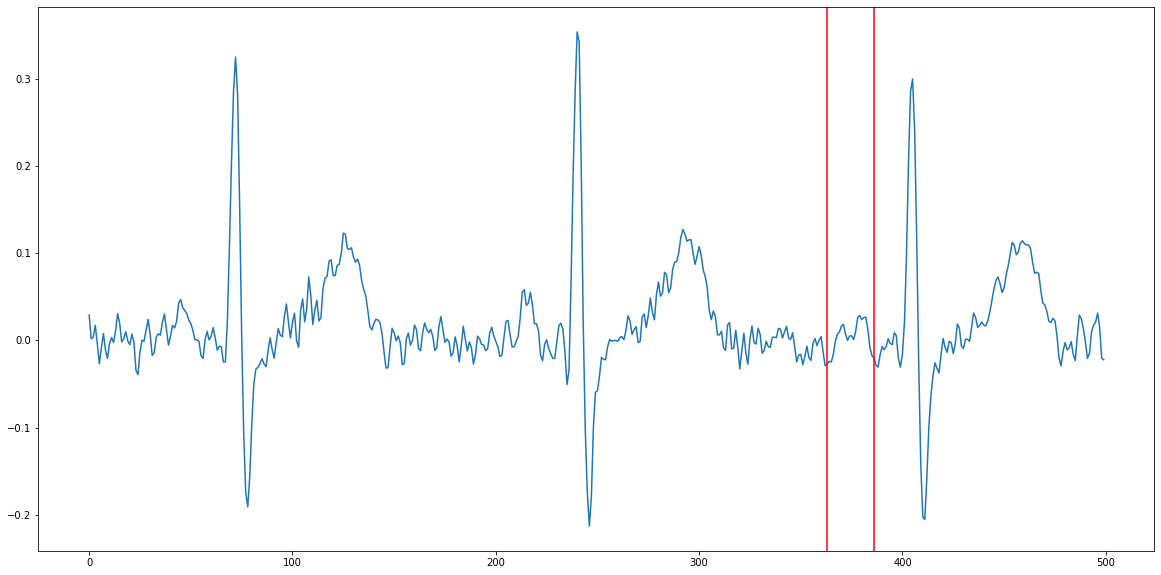

In [220]:
plt.plot(tmp["ECG"][1][:500])
plt.axvline(x=363, color='r')
plt.axvline(x=386, color='r')

In [189]:
np.mean(rr_intervals)

142.70078740157481

In [104]:
z_score = (np.mean(rr_intervals) - mean_baseline) / std_baseline
z_score

0.00014029213735825368

In [190]:
# Define threshold for HRV decrease
threshold_down = mean_baseline * 0.8
print(threshold_down)
threshold_up = mean_baseline * 1.2
print(threshold_up)

140.0982456140351
210.14736842105262


In [274]:
rr_intervals, info = rr_interval(tmp["ECG"][1][0:3750])

In [280]:
signals, info = nk.ecg_process(nk.ecg_clean(tmp["ECG"][1][0:3750], sampling_rate=250), sampling_rate=250, method = 'neurokit')

In [130]:
z_score = (np.mean(rr_intervals) - mean_baseline) / std_baseline
z_score

-3.290518808747604

In [275]:
info

{'ECG_R_Peaks': array([ 240,  404,  569,  733,  890, 1048, 1202, 1353, 1506, 1663, 1821,
        1976, 2131, 2280, 2420, 2563, 2716, 2869, 3018, 3176, 3325, 3467,
        3613]),
 'sampling_rate': 250}

In [276]:
rr_intervals

[164,
 165,
 164,
 157,
 158,
 154,
 151,
 153,
 157,
 158,
 155,
 155,
 149,
 140,
 143,
 153,
 153,
 149,
 158,
 149,
 142,
 146]

In [278]:
for i in range(len(rr_intervals)):
    if rr_intervals[i] < threshold_down:
        print('HRV decrease detected in {} RR interval'.format(i))
    elif rr_intervals[i] > threshold_up:
        print('HRV increase detected in {} RR interval'.format(i))
    else:
        print('Nothing')

Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
HRV decrease detected in 13 RR interval
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing


In [288]:
info

{'ECG_R_Peaks': array([ 240,  404,  569,  733,  890, 1047, 1202, 1353, 1505, 1662, 1820,
        1975, 2130, 2280, 2420, 2563, 2716, 2869, 3017, 3176, 3325, 3466,
        3613]),
 'sampling_rate': 250}

In [289]:
info['ECG_R_Peaks'][13]

2280

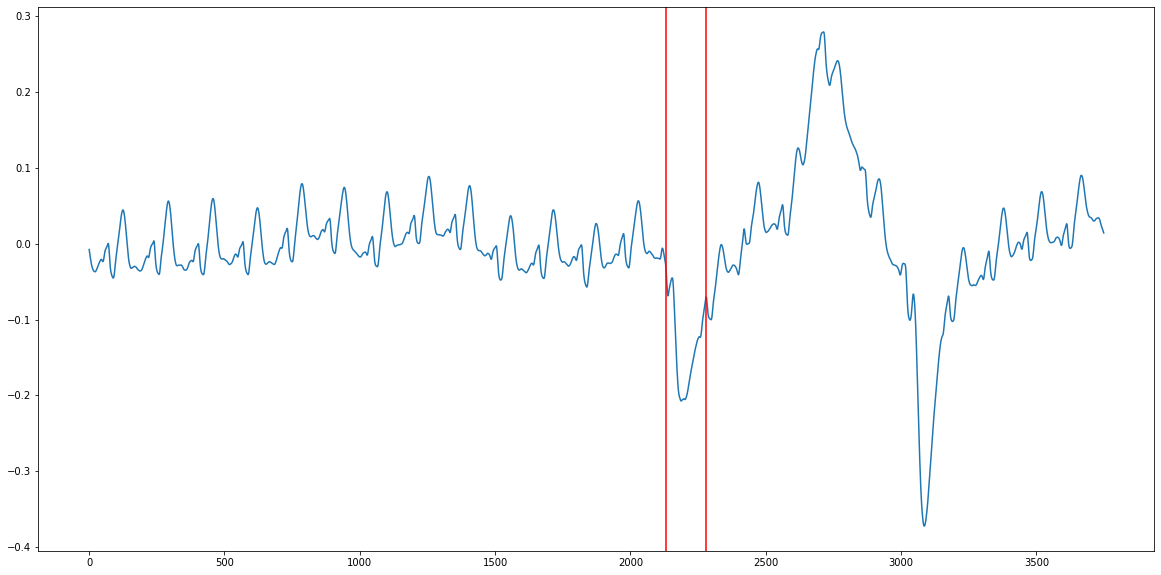

In [294]:
plt.plot(nk.ecg_clean(tmp["ECG"][1][0:3750]))
plt.axvline(x=2130, color='r')
plt.axvline(x=2280, color='r')

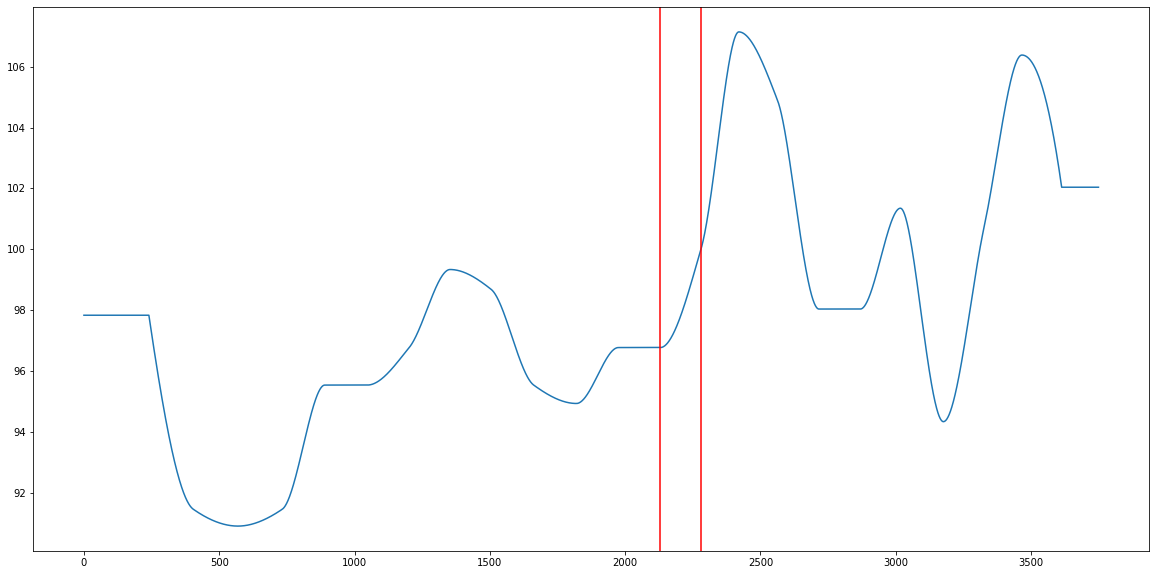

In [290]:
plt.plot(signals['ECG_Rate'])

plt.axvline(x=2130, color='r')
plt.axvline(x=2280, color='r')

In [ ]:
ecg_clean = nk.ecg_clean(tmp["ECG"][1])

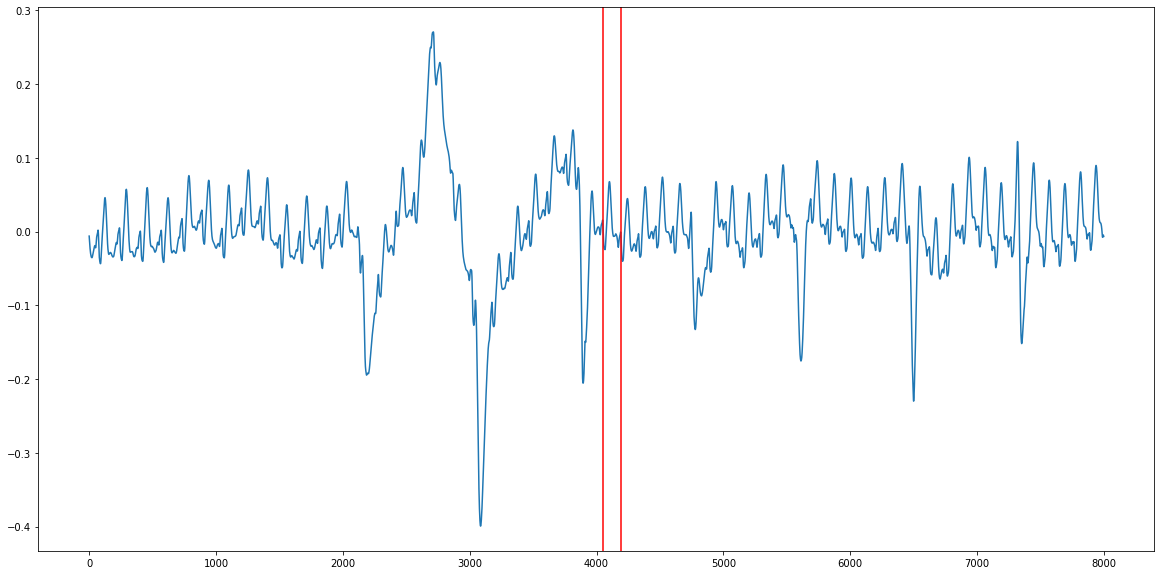

In [250]:
plt.plot(ecg_clean[0:8000])
plt.axvline(x=4192, color='r')
plt.axvline(x=4049, color='r')

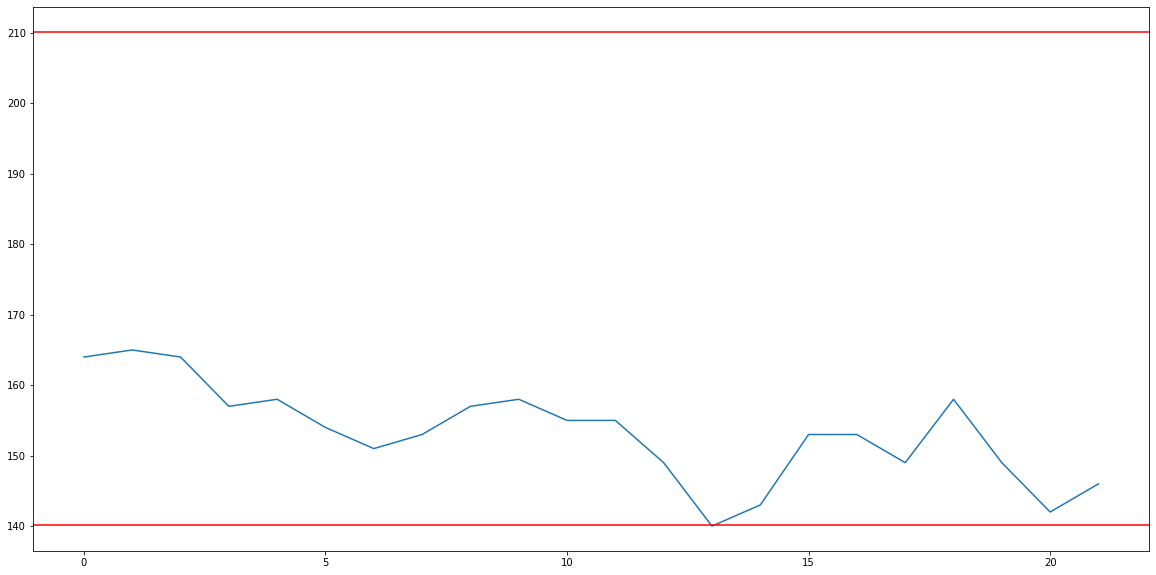

In [279]:
plt.plot(rr_intervals)
plt.axhline(y=threshold_down, color='r')
plt.axhline(y=threshold_up, color='r')

In [285]:
signals['ECG_Rate']

0        97.835755
1        97.835755
2        97.835755
3        97.835755
4        97.835755
           ...    
3745    102.040816
3746    102.040816
3747    102.040816
3748    102.040816
3749    102.040816
Name: ECG_Rate, Length: 3750, dtype: float64

In [283]:
mean_hr

85.6562018873545

In [136]:
for i in range(len(signals)):
    if signals['ECG_Rate'][i] > mean_hr * 1.1:
        print(i,' HR INCREASED')
    elif signals['ECG_Rate'][i] < mean_hr * 0.9:
        print(i,' HR DECREASED')
    else:
        print('Nothing')

0  HR INCREASED
1  HR INCREASED
2  HR INCREASED
3  HR INCREASED
4  HR INCREASED
5  HR INCREASED
6  HR INCREASED
7  HR INCREASED
8  HR INCREASED
9  HR INCREASED
10  HR INCREASED
11  HR INCREASED
12  HR INCREASED
13  HR INCREASED
14  HR INCREASED
15  HR INCREASED
16  HR INCREASED
17  HR INCREASED
18  HR INCREASED
19  HR INCREASED
20  HR INCREASED
21  HR INCREASED
22  HR INCREASED
23  HR INCREASED
24  HR INCREASED
25  HR INCREASED
26  HR INCREASED
27  HR INCREASED
28  HR INCREASED
29  HR INCREASED
30  HR INCREASED
31  HR INCREASED
32  HR INCREASED
33  HR INCREASED
34  HR INCREASED
35  HR INCREASED
36  HR INCREASED
37  HR INCREASED
38  HR INCREASED
39  HR INCREASED
40  HR INCREASED
41  HR INCREASED
42  HR INCREASED
43  HR INCREASED
44  HR INCREASED
45  HR INCREASED
46  HR INCREASED
47  HR INCREASED
48  HR INCREASED
49  HR INCREASED
50  HR INCREASED
51  HR INCREASED
52  HR INCREASED
53  HR INCREASED
54  HR INCREASED
55  HR INCREASED
56  HR INCREASED
57  HR INCREASED
58  HR INCREASED
59  HR 

1060  HR INCREASED
1061  HR INCREASED
1062  HR INCREASED
1063  HR INCREASED
1064  HR INCREASED
1065  HR INCREASED
1066  HR INCREASED
1067  HR INCREASED
1068  HR INCREASED
1069  HR INCREASED
1070  HR INCREASED
1071  HR INCREASED
1072  HR INCREASED
1073  HR INCREASED
1074  HR INCREASED
1075  HR INCREASED
1076  HR INCREASED
1077  HR INCREASED
1078  HR INCREASED
1079  HR INCREASED
1080  HR INCREASED
1081  HR INCREASED
1082  HR INCREASED
1083  HR INCREASED
1084  HR INCREASED
1085  HR INCREASED
1086  HR INCREASED
1087  HR INCREASED
1088  HR INCREASED
1089  HR INCREASED
1090  HR INCREASED
1091  HR INCREASED
1092  HR INCREASED
1093  HR INCREASED
1094  HR INCREASED
1095  HR INCREASED
1096  HR INCREASED
1097  HR INCREASED
1098  HR INCREASED
1099  HR INCREASED
1100  HR INCREASED
1101  HR INCREASED
1102  HR INCREASED
1103  HR INCREASED
1104  HR INCREASED
1105  HR INCREASED
1106  HR INCREASED
1107  HR INCREASED
1108  HR INCREASED
1109  HR INCREASED
1110  HR INCREASED
1111  HR INCREASED
1112  HR INC

1937  HR INCREASED
1938  HR INCREASED
1939  HR INCREASED
1940  HR INCREASED
1941  HR INCREASED
1942  HR INCREASED
1943  HR INCREASED
1944  HR INCREASED
1945  HR INCREASED
1946  HR INCREASED
1947  HR INCREASED
1948  HR INCREASED
1949  HR INCREASED
1950  HR INCREASED
1951  HR INCREASED
1952  HR INCREASED
1953  HR INCREASED
1954  HR INCREASED
1955  HR INCREASED
1956  HR INCREASED
1957  HR INCREASED
1958  HR INCREASED
1959  HR INCREASED
1960  HR INCREASED
1961  HR INCREASED
1962  HR INCREASED
1963  HR INCREASED
1964  HR INCREASED
1965  HR INCREASED
1966  HR INCREASED
1967  HR INCREASED
1968  HR INCREASED
1969  HR INCREASED
1970  HR INCREASED
1971  HR INCREASED
1972  HR INCREASED
1973  HR INCREASED
1974  HR INCREASED
1975  HR INCREASED
1976  HR INCREASED
1977  HR INCREASED
1978  HR INCREASED
1979  HR INCREASED
1980  HR INCREASED
1981  HR INCREASED
1982  HR INCREASED
1983  HR INCREASED
1984  HR INCREASED
1985  HR INCREASED
1986  HR INCREASED
1987  HR INCREASED
1988  HR INCREASED
1989  HR INC

2814  HR INCREASED
2815  HR INCREASED
2816  HR INCREASED
2817  HR INCREASED
2818  HR INCREASED
2819  HR INCREASED
2820  HR INCREASED
2821  HR INCREASED
2822  HR INCREASED
2823  HR INCREASED
2824  HR INCREASED
2825  HR INCREASED
2826  HR INCREASED
2827  HR INCREASED
2828  HR INCREASED
2829  HR INCREASED
2830  HR INCREASED
2831  HR INCREASED
2832  HR INCREASED
2833  HR INCREASED
2834  HR INCREASED
2835  HR INCREASED
2836  HR INCREASED
2837  HR INCREASED
2838  HR INCREASED
2839  HR INCREASED
2840  HR INCREASED
2841  HR INCREASED
2842  HR INCREASED
2843  HR INCREASED
2844  HR INCREASED
2845  HR INCREASED
2846  HR INCREASED
2847  HR INCREASED
2848  HR INCREASED
2849  HR INCREASED
2850  HR INCREASED
2851  HR INCREASED
2852  HR INCREASED
2853  HR INCREASED
2854  HR INCREASED
2855  HR INCREASED
2856  HR INCREASED
2857  HR INCREASED
2858  HR INCREASED
2859  HR INCREASED
2860  HR INCREASED
2861  HR INCREASED
2862  HR INCREASED
2863  HR INCREASED
2864  HR INCREASED
2865  HR INCREASED
2866  HR INC

3677  HR INCREASED
3678  HR INCREASED
3679  HR INCREASED
3680  HR INCREASED
3681  HR INCREASED
3682  HR INCREASED
3683  HR INCREASED
3684  HR INCREASED
3685  HR INCREASED
3686  HR INCREASED
3687  HR INCREASED
3688  HR INCREASED
3689  HR INCREASED
3690  HR INCREASED
3691  HR INCREASED
3692  HR INCREASED
3693  HR INCREASED
3694  HR INCREASED
3695  HR INCREASED
3696  HR INCREASED
3697  HR INCREASED
3698  HR INCREASED
3699  HR INCREASED
3700  HR INCREASED
3701  HR INCREASED
3702  HR INCREASED
3703  HR INCREASED
3704  HR INCREASED
3705  HR INCREASED
3706  HR INCREASED
3707  HR INCREASED
3708  HR INCREASED
3709  HR INCREASED
3710  HR INCREASED
3711  HR INCREASED
3712  HR INCREASED
3713  HR INCREASED
3714  HR INCREASED
3715  HR INCREASED
3716  HR INCREASED
3717  HR INCREASED
3718  HR INCREASED
3719  HR INCREASED
3720  HR INCREASED
3721  HR INCREASED
3722  HR INCREASED
3723  HR INCREASED
3724  HR INCREASED
3725  HR INCREASED
3726  HR INCREASED
3727  HR INCREASED
3728  HR INCREASED
3729  HR INC

4542  HR INCREASED
4543  HR INCREASED
4544  HR INCREASED
4545  HR INCREASED
4546  HR INCREASED
4547  HR INCREASED
4548  HR INCREASED
4549  HR INCREASED
4550  HR INCREASED
4551  HR INCREASED
4552  HR INCREASED
4553  HR INCREASED
4554  HR INCREASED
4555  HR INCREASED
4556  HR INCREASED
4557  HR INCREASED
4558  HR INCREASED
4559  HR INCREASED
4560  HR INCREASED
4561  HR INCREASED
4562  HR INCREASED
4563  HR INCREASED
4564  HR INCREASED
4565  HR INCREASED
4566  HR INCREASED
4567  HR INCREASED
4568  HR INCREASED
4569  HR INCREASED
4570  HR INCREASED
4571  HR INCREASED
4572  HR INCREASED
4573  HR INCREASED
4574  HR INCREASED
4575  HR INCREASED
4576  HR INCREASED
4577  HR INCREASED
4578  HR INCREASED
4579  HR INCREASED
4580  HR INCREASED
4581  HR INCREASED
4582  HR INCREASED
4583  HR INCREASED
4584  HR INCREASED
4585  HR INCREASED
4586  HR INCREASED
4587  HR INCREASED
4588  HR INCREASED
4589  HR INCREASED
4590  HR INCREASED
4591  HR INCREASED
4592  HR INCREASED
4593  HR INCREASED
4594  HR INC

5388  HR INCREASED
5389  HR INCREASED
5390  HR INCREASED
5391  HR INCREASED
5392  HR INCREASED
5393  HR INCREASED
5394  HR INCREASED
5395  HR INCREASED
5396  HR INCREASED
5397  HR INCREASED
5398  HR INCREASED
5399  HR INCREASED
5400  HR INCREASED
5401  HR INCREASED
5402  HR INCREASED
5403  HR INCREASED
5404  HR INCREASED
5405  HR INCREASED
5406  HR INCREASED
5407  HR INCREASED
5408  HR INCREASED
5409  HR INCREASED
5410  HR INCREASED
5411  HR INCREASED
5412  HR INCREASED
5413  HR INCREASED
5414  HR INCREASED
5415  HR INCREASED
5416  HR INCREASED
5417  HR INCREASED
5418  HR INCREASED
5419  HR INCREASED
5420  HR INCREASED
5421  HR INCREASED
5422  HR INCREASED
5423  HR INCREASED
5424  HR INCREASED
5425  HR INCREASED
5426  HR INCREASED
5427  HR INCREASED
5428  HR INCREASED
5429  HR INCREASED
5430  HR INCREASED
5431  HR INCREASED
5432  HR INCREASED
5433  HR INCREASED
5434  HR INCREASED
5435  HR INCREASED
5436  HR INCREASED
5437  HR INCREASED
5438  HR INCREASED
5439  HR INCREASED
5440  HR INC

6273  HR INCREASED
6274  HR INCREASED
6275  HR INCREASED
6276  HR INCREASED
6277  HR INCREASED
6278  HR INCREASED
6279  HR INCREASED
6280  HR INCREASED
6281  HR INCREASED
6282  HR INCREASED
6283  HR INCREASED
6284  HR INCREASED
6285  HR INCREASED
6286  HR INCREASED
6287  HR INCREASED
6288  HR INCREASED
6289  HR INCREASED
6290  HR INCREASED
6291  HR INCREASED
6292  HR INCREASED
6293  HR INCREASED
6294  HR INCREASED
6295  HR INCREASED
6296  HR INCREASED
6297  HR INCREASED
6298  HR INCREASED
6299  HR INCREASED
6300  HR INCREASED
6301  HR INCREASED
6302  HR INCREASED
6303  HR INCREASED
6304  HR INCREASED
6305  HR INCREASED
6306  HR INCREASED
6307  HR INCREASED
6308  HR INCREASED
6309  HR INCREASED
6310  HR INCREASED
6311  HR INCREASED
6312  HR INCREASED
6313  HR INCREASED
6314  HR INCREASED
6315  HR INCREASED
6316  HR INCREASED
6317  HR INCREASED
6318  HR INCREASED
6319  HR INCREASED
6320  HR INCREASED
6321  HR INCREASED
6322  HR INCREASED
6323  HR INCREASED
6324  HR INCREASED
6325  HR INC

7144  HR INCREASED
7145  HR INCREASED
7146  HR INCREASED
7147  HR INCREASED
7148  HR INCREASED
7149  HR INCREASED
7150  HR INCREASED
7151  HR INCREASED
7152  HR INCREASED
7153  HR INCREASED
7154  HR INCREASED
7155  HR INCREASED
7156  HR INCREASED
7157  HR INCREASED
7158  HR INCREASED
7159  HR INCREASED
7160  HR INCREASED
7161  HR INCREASED
7162  HR INCREASED
7163  HR INCREASED
7164  HR INCREASED
7165  HR INCREASED
7166  HR INCREASED
7167  HR INCREASED
7168  HR INCREASED
7169  HR INCREASED
7170  HR INCREASED
7171  HR INCREASED
7172  HR INCREASED
7173  HR INCREASED
7174  HR INCREASED
7175  HR INCREASED
7176  HR INCREASED
7177  HR INCREASED
7178  HR INCREASED
7179  HR INCREASED
7180  HR INCREASED
7181  HR INCREASED
7182  HR INCREASED
7183  HR INCREASED
7184  HR INCREASED
7185  HR INCREASED
7186  HR INCREASED
7187  HR INCREASED
7188  HR INCREASED
7189  HR INCREASED
7190  HR INCREASED
7191  HR INCREASED
7192  HR INCREASED
7193  HR INCREASED
7194  HR INCREASED
7195  HR INCREASED
7196  HR INC

7973  HR INCREASED
7974  HR INCREASED
7975  HR INCREASED
7976  HR INCREASED
7977  HR INCREASED
7978  HR INCREASED
7979  HR INCREASED
7980  HR INCREASED
7981  HR INCREASED
7982  HR INCREASED
7983  HR INCREASED
7984  HR INCREASED
7985  HR INCREASED
7986  HR INCREASED
7987  HR INCREASED
7988  HR INCREASED
7989  HR INCREASED
7990  HR INCREASED
7991  HR INCREASED
7992  HR INCREASED
7993  HR INCREASED
7994  HR INCREASED
7995  HR INCREASED
7996  HR INCREASED
7997  HR INCREASED
7998  HR INCREASED
7999  HR INCREASED
8000  HR INCREASED
8001  HR INCREASED
8002  HR INCREASED
8003  HR INCREASED
8004  HR INCREASED
8005  HR INCREASED
8006  HR INCREASED
8007  HR INCREASED
8008  HR INCREASED
8009  HR INCREASED
8010  HR INCREASED
8011  HR INCREASED
8012  HR INCREASED
8013  HR INCREASED
8014  HR INCREASED
8015  HR INCREASED
8016  HR INCREASED
8017  HR INCREASED
8018  HR INCREASED
8019  HR INCREASED
8020  HR INCREASED
8021  HR INCREASED
8022  HR INCREASED
8023  HR INCREASED
8024  HR INCREASED
8025  HR INC

8839  HR INCREASED
8840  HR INCREASED
8841  HR INCREASED
8842  HR INCREASED
8843  HR INCREASED
8844  HR INCREASED
8845  HR INCREASED
8846  HR INCREASED
8847  HR INCREASED
8848  HR INCREASED
8849  HR INCREASED
8850  HR INCREASED
8851  HR INCREASED
8852  HR INCREASED
8853  HR INCREASED
8854  HR INCREASED
8855  HR INCREASED
8856  HR INCREASED
8857  HR INCREASED
8858  HR INCREASED
8859  HR INCREASED
8860  HR INCREASED
8861  HR INCREASED
8862  HR INCREASED
8863  HR INCREASED
8864  HR INCREASED
8865  HR INCREASED
8866  HR INCREASED
8867  HR INCREASED
8868  HR INCREASED
8869  HR INCREASED
8870  HR INCREASED
8871  HR INCREASED
8872  HR INCREASED
8873  HR INCREASED
8874  HR INCREASED
8875  HR INCREASED
8876  HR INCREASED
8877  HR INCREASED
8878  HR INCREASED
8879  HR INCREASED
8880  HR INCREASED
8881  HR INCREASED
8882  HR INCREASED
8883  HR INCREASED
8884  HR INCREASED
8885  HR INCREASED
8886  HR INCREASED
8887  HR INCREASED
8888  HR INCREASED
8889  HR INCREASED
8890  HR INCREASED
8891  HR INC

9616  HR INCREASED
9617  HR INCREASED
9618  HR INCREASED
9619  HR INCREASED
9620  HR INCREASED
9621  HR INCREASED
9622  HR INCREASED
9623  HR INCREASED
9624  HR INCREASED
9625  HR INCREASED
9626  HR INCREASED
9627  HR INCREASED
9628  HR INCREASED
9629  HR INCREASED
9630  HR INCREASED
9631  HR INCREASED
9632  HR INCREASED
9633  HR INCREASED
9634  HR INCREASED
9635  HR INCREASED
9636  HR INCREASED
9637  HR INCREASED
9638  HR INCREASED
9639  HR INCREASED
9640  HR INCREASED
9641  HR INCREASED
9642  HR INCREASED
9643  HR INCREASED
9644  HR INCREASED
9645  HR INCREASED
9646  HR INCREASED
9647  HR INCREASED
9648  HR INCREASED
9649  HR INCREASED
9650  HR INCREASED
9651  HR INCREASED
9652  HR INCREASED
9653  HR INCREASED
9654  HR INCREASED
9655  HR INCREASED
9656  HR INCREASED
9657  HR INCREASED
9658  HR INCREASED
9659  HR INCREASED
9660  HR INCREASED
9661  HR INCREASED
9662  HR INCREASED
9663  HR INCREASED
9664  HR INCREASED
9665  HR INCREASED
9666  HR INCREASED
9667  HR INCREASED
9668  HR INC

10408  HR INCREASED
10409  HR INCREASED
10410  HR INCREASED
10411  HR INCREASED
10412  HR INCREASED
10413  HR INCREASED
10414  HR INCREASED
10415  HR INCREASED
10416  HR INCREASED
10417  HR INCREASED
10418  HR INCREASED
10419  HR INCREASED
10420  HR INCREASED
10421  HR INCREASED
10422  HR INCREASED
10423  HR INCREASED
10424  HR INCREASED
10425  HR INCREASED
10426  HR INCREASED
10427  HR INCREASED
10428  HR INCREASED
10429  HR INCREASED
10430  HR INCREASED
10431  HR INCREASED
10432  HR INCREASED
10433  HR INCREASED
10434  HR INCREASED
10435  HR INCREASED
10436  HR INCREASED
10437  HR INCREASED
10438  HR INCREASED
10439  HR INCREASED
10440  HR INCREASED
10441  HR INCREASED
10442  HR INCREASED
10443  HR INCREASED
10444  HR INCREASED
10445  HR INCREASED
10446  HR INCREASED
10447  HR INCREASED
10448  HR INCREASED
10449  HR INCREASED
10450  HR INCREASED
10451  HR INCREASED
10452  HR INCREASED
10453  HR INCREASED
10454  HR INCREASED
10455  HR INCREASED
10456  HR INCREASED
10457  HR INCREASED


11205  HR INCREASED
11206  HR INCREASED
11207  HR INCREASED
11208  HR INCREASED
11209  HR INCREASED
11210  HR INCREASED
11211  HR INCREASED
11212  HR INCREASED
11213  HR INCREASED
11214  HR INCREASED
11215  HR INCREASED
11216  HR INCREASED
11217  HR INCREASED
11218  HR INCREASED
11219  HR INCREASED
11220  HR INCREASED
11221  HR INCREASED
11222  HR INCREASED
11223  HR INCREASED
11224  HR INCREASED
11225  HR INCREASED
11226  HR INCREASED
11227  HR INCREASED
11228  HR INCREASED
11229  HR INCREASED
11230  HR INCREASED
11231  HR INCREASED
11232  HR INCREASED
11233  HR INCREASED
11234  HR INCREASED
11235  HR INCREASED
11236  HR INCREASED
11237  HR INCREASED
11238  HR INCREASED
11239  HR INCREASED
11240  HR INCREASED
11241  HR INCREASED
11242  HR INCREASED
11243  HR INCREASED
11244  HR INCREASED
11245  HR INCREASED
11246  HR INCREASED
11247  HR INCREASED
11248  HR INCREASED
11249  HR INCREASED
11250  HR INCREASED
11251  HR INCREASED
11252  HR INCREASED
11253  HR INCREASED
11254  HR INCREASED


11953  HR INCREASED
11954  HR INCREASED
11955  HR INCREASED
11956  HR INCREASED
11957  HR INCREASED
11958  HR INCREASED
11959  HR INCREASED
11960  HR INCREASED
11961  HR INCREASED
11962  HR INCREASED
11963  HR INCREASED
11964  HR INCREASED
11965  HR INCREASED
11966  HR INCREASED
11967  HR INCREASED
11968  HR INCREASED
11969  HR INCREASED
11970  HR INCREASED
11971  HR INCREASED
11972  HR INCREASED
11973  HR INCREASED
11974  HR INCREASED
11975  HR INCREASED
11976  HR INCREASED
11977  HR INCREASED
11978  HR INCREASED
11979  HR INCREASED
11980  HR INCREASED
11981  HR INCREASED
11982  HR INCREASED
11983  HR INCREASED
11984  HR INCREASED
11985  HR INCREASED
11986  HR INCREASED
11987  HR INCREASED
11988  HR INCREASED
11989  HR INCREASED
11990  HR INCREASED
11991  HR INCREASED
11992  HR INCREASED
11993  HR INCREASED
11994  HR INCREASED
11995  HR INCREASED
11996  HR INCREASED
11997  HR INCREASED
11998  HR INCREASED
11999  HR INCREASED
12000  HR INCREASED
12001  HR INCREASED
12002  HR INCREASED


12688  HR INCREASED
12689  HR INCREASED
12690  HR INCREASED
12691  HR INCREASED
12692  HR INCREASED
12693  HR INCREASED
12694  HR INCREASED
12695  HR INCREASED
12696  HR INCREASED
12697  HR INCREASED
12698  HR INCREASED
12699  HR INCREASED
12700  HR INCREASED
12701  HR INCREASED
12702  HR INCREASED
12703  HR INCREASED
12704  HR INCREASED
12705  HR INCREASED
12706  HR INCREASED
12707  HR INCREASED
12708  HR INCREASED
12709  HR INCREASED
12710  HR INCREASED
12711  HR INCREASED
12712  HR INCREASED
12713  HR INCREASED
12714  HR INCREASED
12715  HR INCREASED
12716  HR INCREASED
12717  HR INCREASED
12718  HR INCREASED
12719  HR INCREASED
12720  HR INCREASED
12721  HR INCREASED
12722  HR INCREASED
12723  HR INCREASED
12724  HR INCREASED
12725  HR INCREASED
12726  HR INCREASED
12727  HR INCREASED
12728  HR INCREASED
12729  HR INCREASED
12730  HR INCREASED
12731  HR INCREASED
12732  HR INCREASED
12733  HR INCREASED
12734  HR INCREASED
12735  HR INCREASED
12736  HR INCREASED
12737  HR INCREASED


13438  HR INCREASED
13439  HR INCREASED
13440  HR INCREASED
13441  HR INCREASED
13442  HR INCREASED
13443  HR INCREASED
13444  HR INCREASED
13445  HR INCREASED
13446  HR INCREASED
13447  HR INCREASED
13448  HR INCREASED
13449  HR INCREASED
13450  HR INCREASED
13451  HR INCREASED
13452  HR INCREASED
13453  HR INCREASED
13454  HR INCREASED
13455  HR INCREASED
13456  HR INCREASED
13457  HR INCREASED
13458  HR INCREASED
13459  HR INCREASED
13460  HR INCREASED
13461  HR INCREASED
13462  HR INCREASED
13463  HR INCREASED
13464  HR INCREASED
13465  HR INCREASED
13466  HR INCREASED
13467  HR INCREASED
13468  HR INCREASED
13469  HR INCREASED
13470  HR INCREASED
13471  HR INCREASED
13472  HR INCREASED
13473  HR INCREASED
13474  HR INCREASED
13475  HR INCREASED
13476  HR INCREASED
13477  HR INCREASED
13478  HR INCREASED
13479  HR INCREASED
13480  HR INCREASED
13481  HR INCREASED
13482  HR INCREASED
13483  HR INCREASED
13484  HR INCREASED
13485  HR INCREASED
13486  HR INCREASED
13487  HR INCREASED


14381  HR INCREASED
14382  HR INCREASED
14383  HR INCREASED
14384  HR INCREASED
14385  HR INCREASED
14386  HR INCREASED
14387  HR INCREASED
14388  HR INCREASED
14389  HR INCREASED
14390  HR INCREASED
14391  HR INCREASED
14392  HR INCREASED
14393  HR INCREASED
14394  HR INCREASED
14395  HR INCREASED
14396  HR INCREASED
14397  HR INCREASED
14398  HR INCREASED
14399  HR INCREASED
14400  HR INCREASED
14401  HR INCREASED
14402  HR INCREASED
14403  HR INCREASED
14404  HR INCREASED
14405  HR INCREASED
14406  HR INCREASED
14407  HR INCREASED
14408  HR INCREASED
14409  HR INCREASED
14410  HR INCREASED
14411  HR INCREASED
14412  HR INCREASED
14413  HR INCREASED
14414  HR INCREASED
14415  HR INCREASED
14416  HR INCREASED
14417  HR INCREASED
14418  HR INCREASED
14419  HR INCREASED
14420  HR INCREASED
14421  HR INCREASED
14422  HR INCREASED
14423  HR INCREASED
14424  HR INCREASED
14425  HR INCREASED
14426  HR INCREASED
14427  HR INCREASED
14428  HR INCREASED
14429  HR INCREASED
14430  HR INCREASED


15436  HR INCREASED
15437  HR INCREASED
15438  HR INCREASED
15439  HR INCREASED
15440  HR INCREASED
15441  HR INCREASED
15442  HR INCREASED
15443  HR INCREASED
15444  HR INCREASED
15445  HR INCREASED
15446  HR INCREASED
15447  HR INCREASED
15448  HR INCREASED
15449  HR INCREASED
15450  HR INCREASED
15451  HR INCREASED
15452  HR INCREASED
15453  HR INCREASED
15454  HR INCREASED
15455  HR INCREASED
15456  HR INCREASED
15457  HR INCREASED
15458  HR INCREASED
15459  HR INCREASED
15460  HR INCREASED
15461  HR INCREASED
15462  HR INCREASED
15463  HR INCREASED
15464  HR INCREASED
15465  HR INCREASED
15466  HR INCREASED
15467  HR INCREASED
15468  HR INCREASED
15469  HR INCREASED
15470  HR INCREASED
15471  HR INCREASED
15472  HR INCREASED
15473  HR INCREASED
15474  HR INCREASED
15475  HR INCREASED
15476  HR INCREASED
15477  HR INCREASED
15478  HR INCREASED
15479  HR INCREASED
15480  HR INCREASED
15481  HR INCREASED
15482  HR INCREASED
15483  HR INCREASED
15484  HR INCREASED
15485  HR INCREASED


Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing


17913  HR INCREASED
17914  HR INCREASED
17915  HR INCREASED
17916  HR INCREASED
17917  HR INCREASED
17918  HR INCREASED
17919  HR INCREASED
17920  HR INCREASED
17921  HR INCREASED
17922  HR INCREASED
17923  HR INCREASED
17924  HR INCREASED
17925  HR INCREASED
17926  HR INCREASED
17927  HR INCREASED
17928  HR INCREASED
17929  HR INCREASED
17930  HR INCREASED
17931  HR INCREASED
17932  HR INCREASED
17933  HR INCREASED
17934  HR INCREASED
17935  HR INCREASED
17936  HR INCREASED
17937  HR INCREASED
17938  HR INCREASED
17939  HR INCREASED
17940  HR INCREASED
17941  HR INCREASED
17942  HR INCREASED
17943  HR INCREASED
17944  HR INCREASED
17945  HR INCREASED
17946  HR INCREASED
17947  HR INCREASED
17948  HR INCREASED
17949  HR INCREASED
17950  HR INCREASED
17951  HR INCREASED
17952  HR INCREASED
17953  HR INCREASED
17954  HR INCREASED
17955  HR INCREASED
17956  HR INCREASED
17957  HR INCREASED
17958  HR INCREASED
17959  HR INCREASED
17960  HR INCREASED
17961  HR INCREASED
17962  HR INCREASED


18670  HR INCREASED
18671  HR INCREASED
18672  HR INCREASED
18673  HR INCREASED
18674  HR INCREASED
18675  HR INCREASED
18676  HR INCREASED
18677  HR INCREASED
18678  HR INCREASED
18679  HR INCREASED
18680  HR INCREASED
18681  HR INCREASED
18682  HR INCREASED
18683  HR INCREASED
18684  HR INCREASED
18685  HR INCREASED
18686  HR INCREASED
18687  HR INCREASED
18688  HR INCREASED
18689  HR INCREASED
18690  HR INCREASED
18691  HR INCREASED
18692  HR INCREASED
18693  HR INCREASED
18694  HR INCREASED
18695  HR INCREASED
18696  HR INCREASED
18697  HR INCREASED
18698  HR INCREASED
18699  HR INCREASED
18700  HR INCREASED
18701  HR INCREASED
18702  HR INCREASED
18703  HR INCREASED
18704  HR INCREASED
18705  HR INCREASED
18706  HR INCREASED
18707  HR INCREASED
18708  HR INCREASED
18709  HR INCREASED
18710  HR INCREASED
18711  HR INCREASED
18712  HR INCREASED
18713  HR INCREASED
18714  HR INCREASED
18715  HR INCREASED
18716  HR INCREASED
18717  HR INCREASED
18718  HR INCREASED
18719  HR INCREASED


In [281]:
signals

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,-0.003140,-0.007609,97.835755,1.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,-0.013040,-0.015432,97.835755,1.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,-0.020950,-0.022672,97.835755,1.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,-0.027219,-0.028936,97.835755,1.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,-0.033129,-0.034001,97.835755,1.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,-0.009410,-0.006500,102.040816,0.962827,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3746,-0.007340,-0.003655,102.040816,0.962827,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3747,-0.006332,-0.001221,102.040816,0.962827,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3748,-0.005460,0.000844,102.040816,0.962827,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


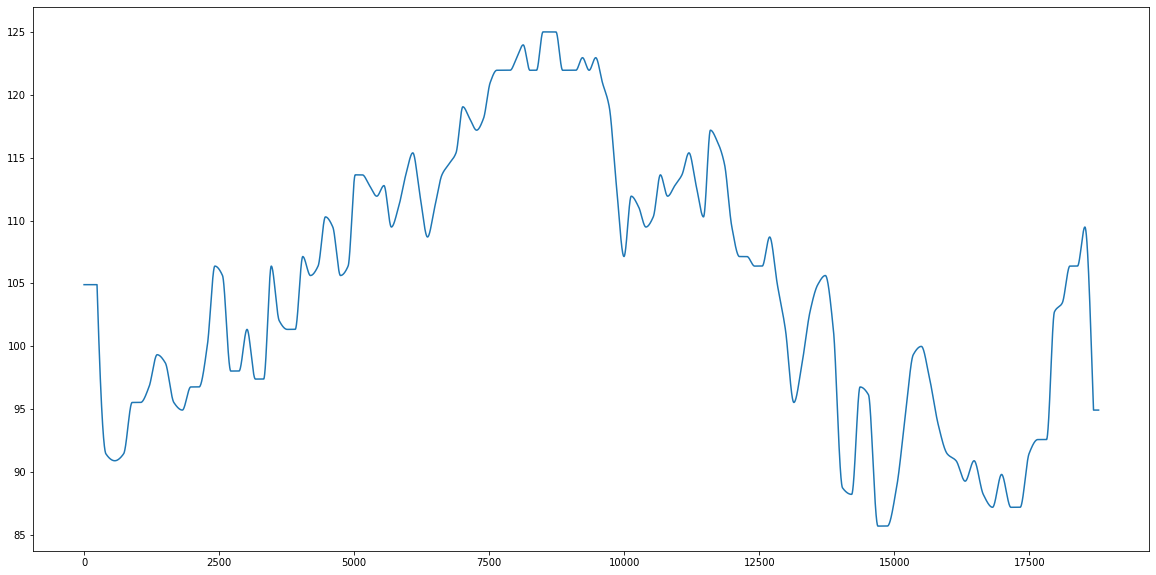

In [138]:
plt.plot(signals['ECG_Rate'])

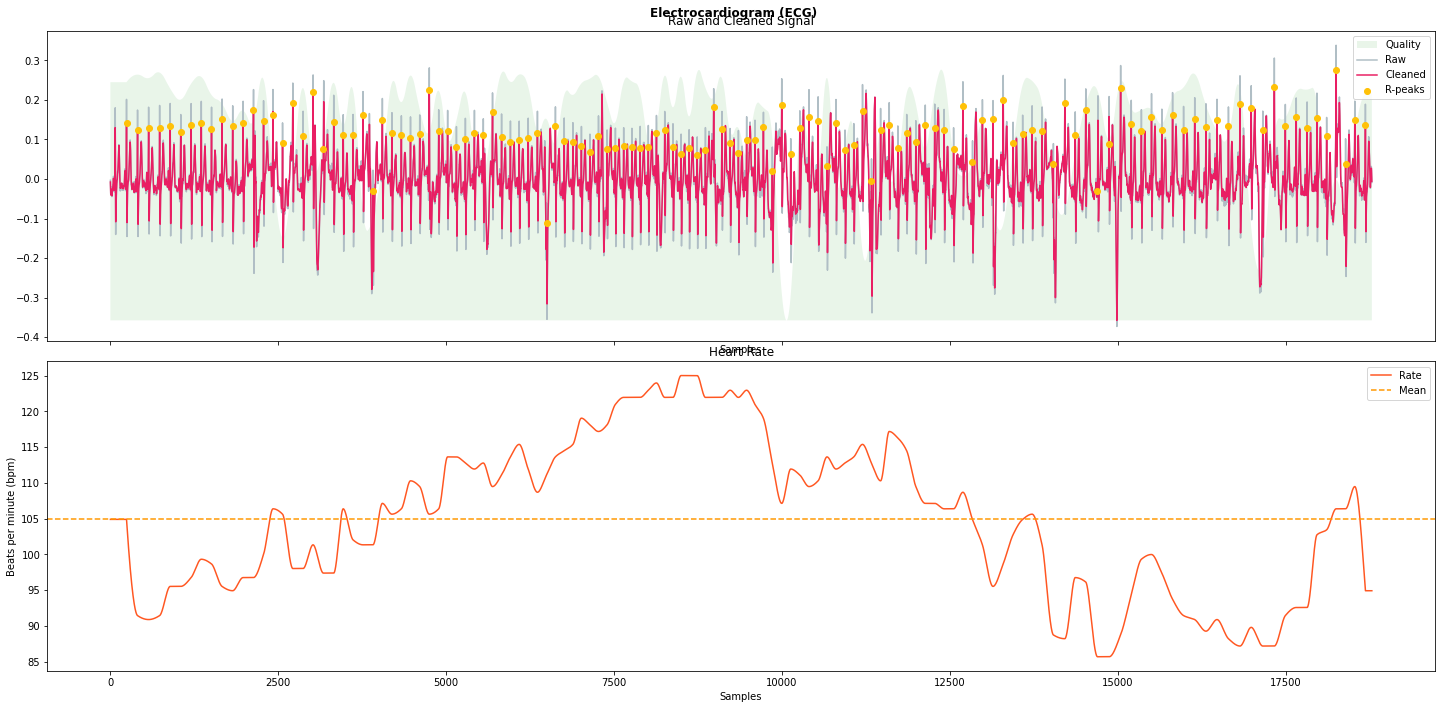

In [139]:
nk.ecg_plot(signals)

# Batches

In [ ]:
ecg_batches = list(divide_chunks(df['ECG'][0],1250))

In [ ]:
ecg_batches = [x for x in ecg_batches if len(x) >= 250]

In [ ]:
hrv_means = []
i = 0
for ecg_batch in ecg_batches:
    print(i)
    ecg_cleaned = nk.ecg_clean(ecg_batch, sampling_rate=250)
    rpeaks, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=250, correct_artifacts=True)
    hrv_features = nk.hrv_time(rpeaks)
    hrv_means.append(hrv_features['HRV_MeanNN'][0])
    i+=1

block2_level1


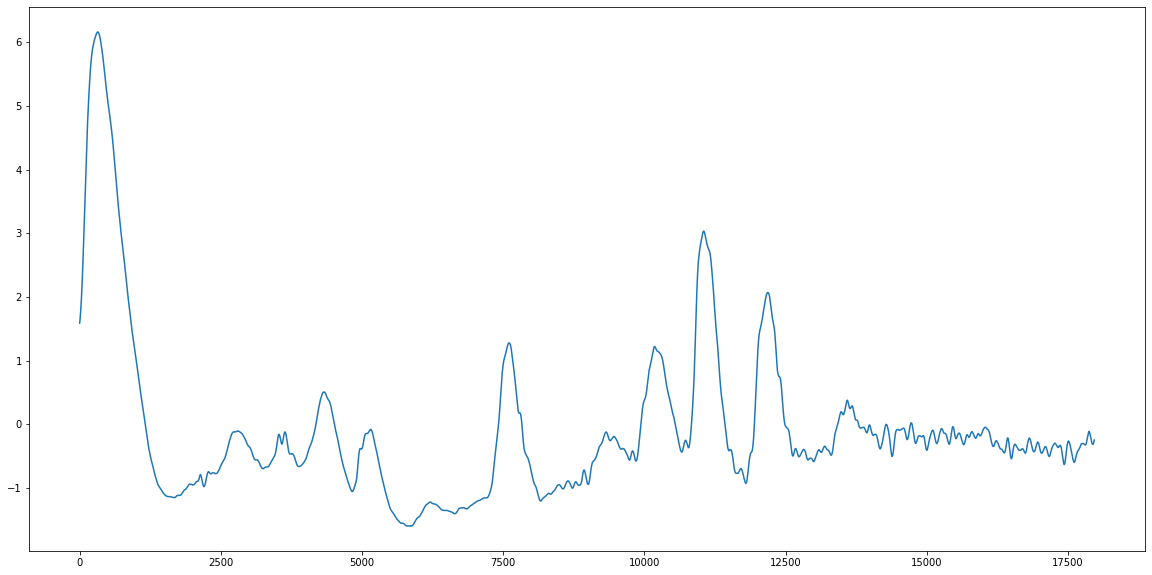

In [37]:
plt.plot(df['SGR'][1473])
print(df['block'][1473])

# TESTS

In [84]:
signals, info = nk.ecg_process(df['ECG'][1473][:2000], sampling_rate=250, method = 'neurokit')

In [85]:
signals

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,-0.04800,-0.015431,75.376884,0.869688,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,-0.08150,0.027021,75.376884,0.869688,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,-0.02125,0.075724,75.376884,0.869688,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,0.11900,0.130796,75.376884,0.869688,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,0.19400,0.184009,75.376884,0.869688,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.01700,-0.067314,84.269663,0.620189,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,1.0,1.0
1996,-0.03950,-0.070153,84.269663,0.620189,0,0,0,0,0,0,0,0,0,0,1,NaN,0.0,0.0,0.0
1997,-0.02500,-0.069791,84.269663,0.620189,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1998,0.00425,-0.067737,84.269663,0.620189,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


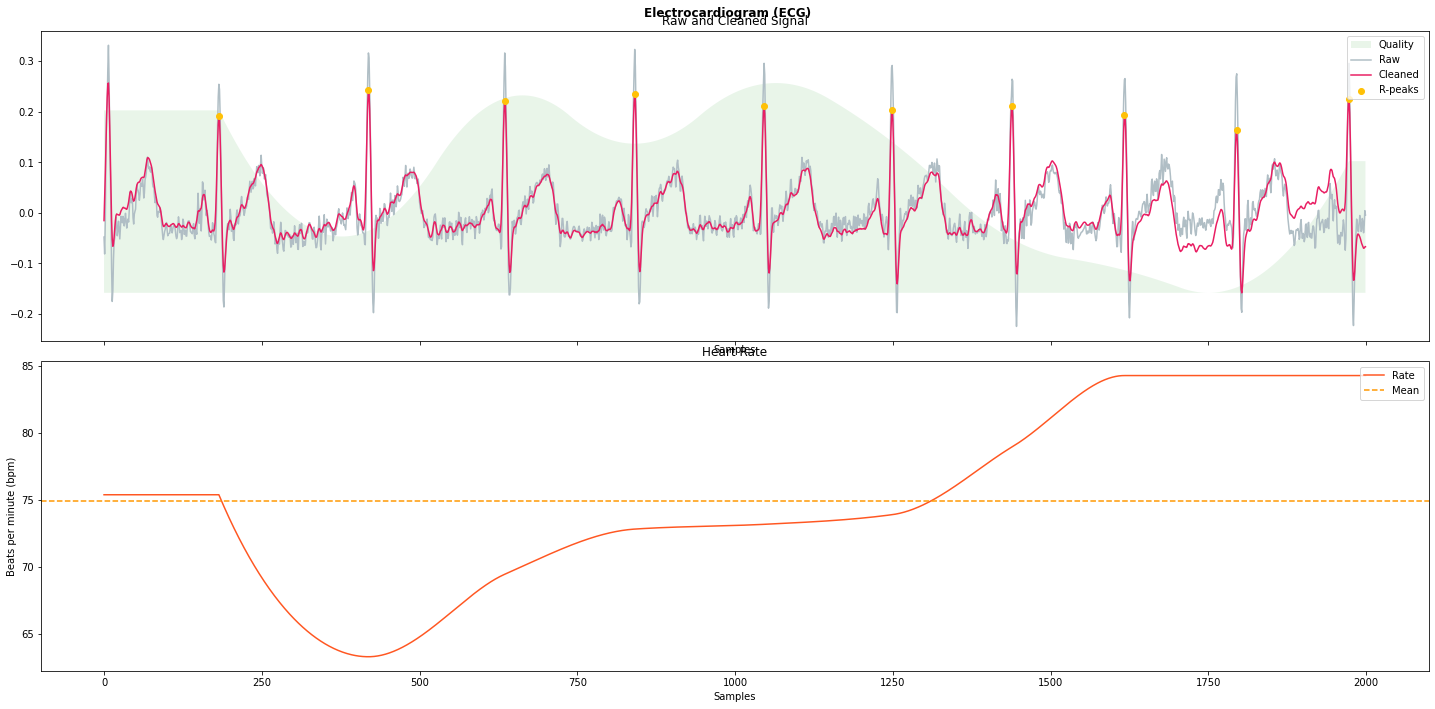

In [86]:
nk.ecg_plot(signals)

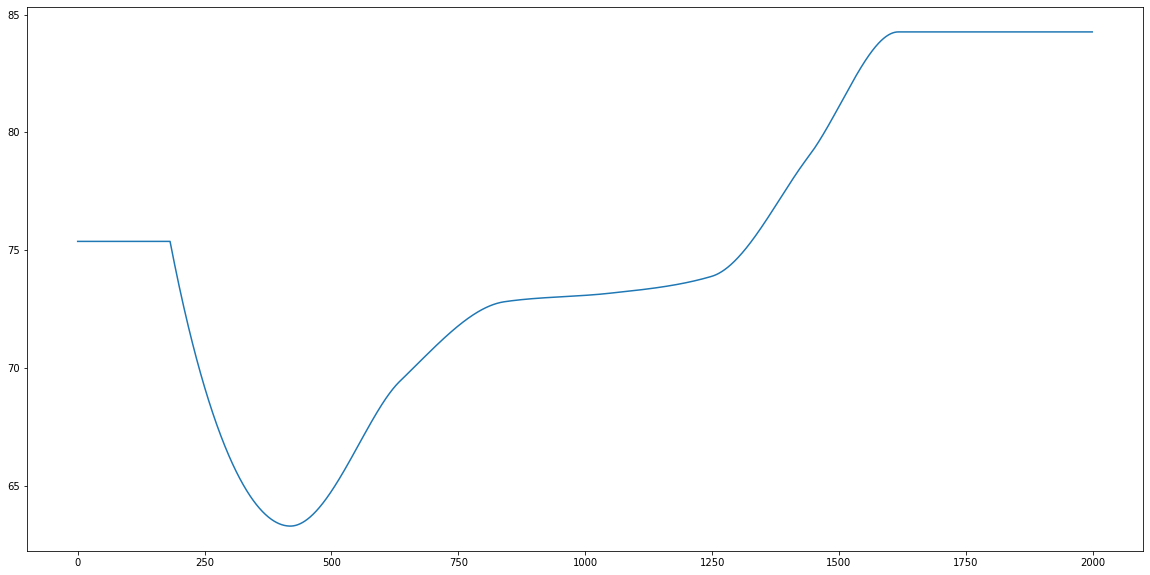

In [87]:
plt.plot(signals['ECG_Rate'])

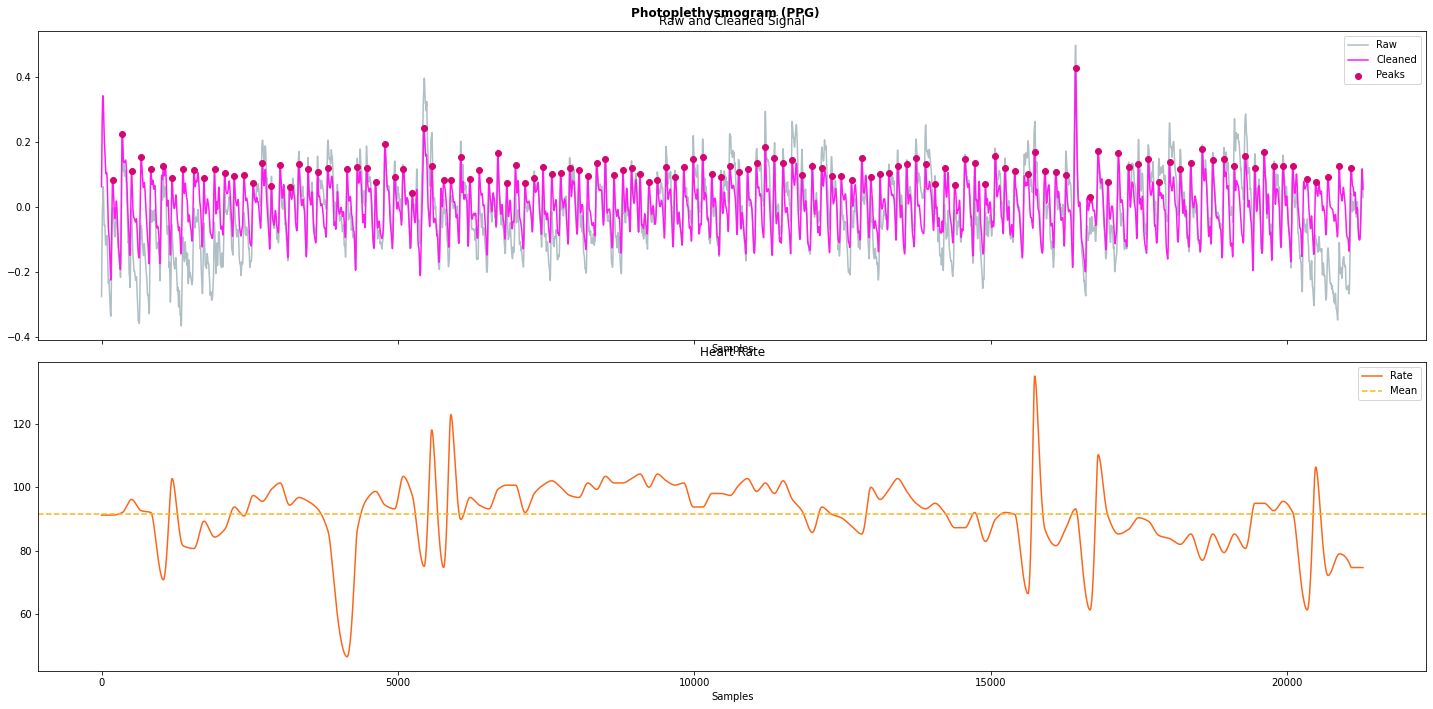

In [9]:
signals, info = nk.ppg_process(df.PPG[1], sampling_rate=250)

nk.ppg_plot(signals)

In [163]:
test = pd.DataFrame({"ECG_Raw" : df['ECG'][0],
                        "ECG_NeuroKit" : nk.ecg_clean(df['ECG'][0], sampling_rate=250, method="neurokit"),
                        "ECG_BioSPPy" : nk.ecg_clean(df['ECG'][0], sampling_rate=250, method="biosppy"),
                        "ECG_PanTompkins" : nk.ecg_clean(df['ECG'][0], sampling_rate=250, method="pantompkins1985"),
                        "ECG_Hamilton" : nk.ecg_clean(df['ECG'][0], sampling_rate=250, method="hamilton2002"),
                        "ECG_Elgendi" : nk.ecg_clean(df['ECG'][0], sampling_rate=250, method="elgendi2010"),
                        "ECG_EngZeeMod" : nk.ecg_clean(df['ECG'][0], sampling_rate=250, method="engzeemod2012")})

In [8]:
for k in range(821,841):
    signals, info = nk.ecg_process(df['ECG'][k], sampling_rate=250, method = 'neurokit')
    time_diff = []
    for i in range(len(info['ECG_R_Peaks'])):
        if i == len(info['ECG_R_Peaks'])-1:
            break
        else:
            time_diff.append(info['ECG_R_Peaks'][i+1] - info['ECG_R_Peaks'][i])
    HRV = [x*4 for x in time_diff]
    plt.plot(HRV)
    plt.savefig('plots/{}.png'.format(df['block'][k]))
    plt.close()

c:\users\fahre_000\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\fahre_000\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


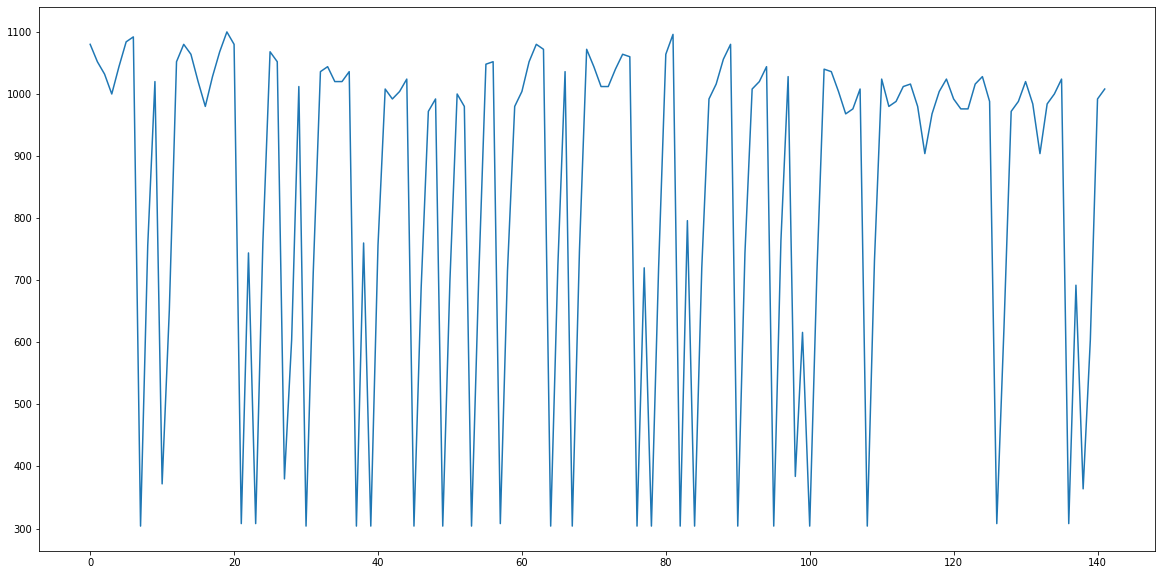

In [10]:
signals, info = nk.ecg_process(df['ECG'][821], sampling_rate=250, method = 'neurokit')
time_diff = []
for i in range(len(info['ECG_R_Peaks'])):
    if i == len(info['ECG_R_Peaks'])-1:
        break
    else:
        time_diff.append(info['ECG_R_Peaks'][i+1] - info['ECG_R_Peaks'][i])
HRV = [x*4 for x in time_diff]
plt.plot(HRV)

In [324]:
k = 3
signals, info = nk.ecg_process(df['ECG'][k], sampling_rate=250, method = 'neurokit')

In [325]:
print(df['block'][k])

block1_level3


In [326]:
signals

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,0.05925,0.212890,70.623484,0.933492,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,0.05350,0.209103,70.623484,0.933492,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,0.04100,0.204429,70.623484,0.933492,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,0.04625,0.200829,70.623484,0.933492,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,0.05650,0.198733,70.623484,0.933492,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21276,0.06650,-0.028326,86.705202,0.992856,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
21277,0.07275,-0.026417,86.705202,0.992856,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
21278,0.07425,-0.025523,86.705202,0.992856,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
21279,0.06975,-0.025571,86.705202,0.992856,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


In [327]:
# nk.ecg_quality(signals['ECG_Clean'],
#                sampling_rate=250,
#                method="zhao2018",
#                approach="fuzzy")

In [328]:
# epochs = nk.epochs_create(signals, events=[0, 15000], sampling_rate=250, epochs_end=150)

# nk.ecg_intervalrelated(epochs)

In [329]:
info

{'ECG_R_Peaks': array([  135,   383,   563,   743,   924,  1096,  1286,  1464,  1627,
         1801,  1972,  2143,  2316,  2502,  2683,  2874,  3069,  3239,
         3420,  3602,  3776,  3950,  4127,  4285,  4444,  4603,  4765,
         4924,  5094,  5273,  5453,  5611,  5811,  6012,  6184,  6371,
         6541,  6711,  6883,  7049,  7208,  7377,  7554,  7747,  7942,
         8147,  8352,  8551,  8756,  8956,  9144,  9332,  9506,  9675,
         9850, 10033, 10195, 10379, 10565, 10748, 10937, 11135, 11322,
        11490, 11676, 11854, 12022, 12210, 12388, 12551, 12716, 12885,
        13065, 13234, 13437, 13635, 13830, 14032, 14226, 14418, 14585,
        15084, 15584, 15702, 15854, 16853, 17532, 18135, 18418, 18768,
        19118, 19339, 19560, 19917, 20275, 20454, 20622, 20799, 20989,
        21162]),
 'sampling_rate': 250}

In [330]:
time_diff = []
for i in range(len(info['ECG_R_Peaks'])):
    if i == len(info['ECG_R_Peaks'])-1:
        break
    else:
        time_diff.append(info['ECG_R_Peaks'][i+1] - info['ECG_R_Peaks'][i])
HRV = [x*4 for x in time_diff]

In [333]:
filtered_HRV = [h for h in HRV if h < 1000]

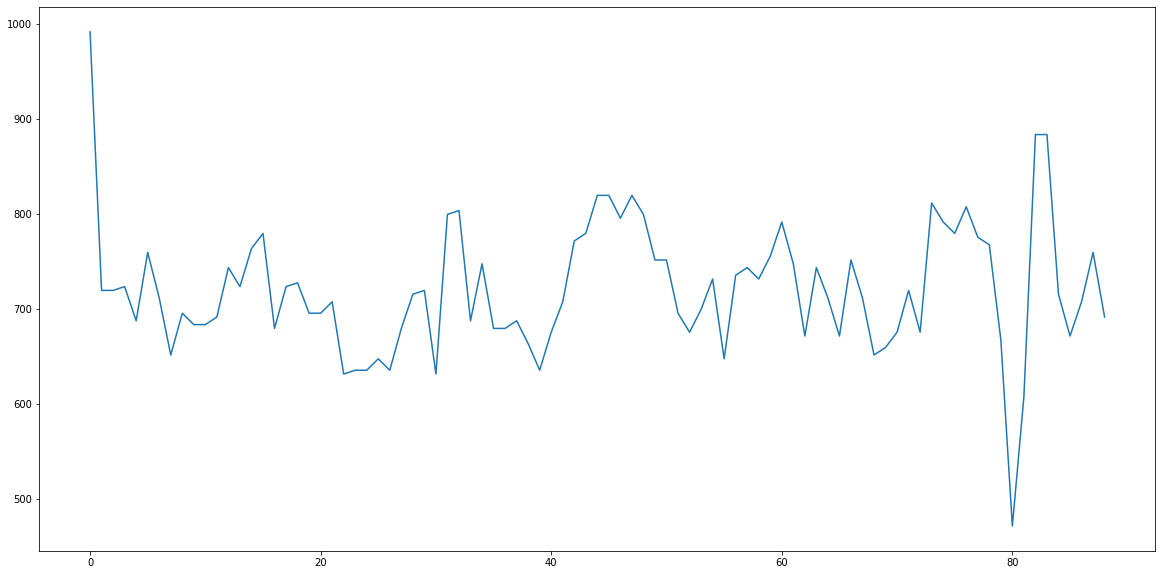

In [334]:
plt.plot(filtered_HRV)
plt.savefig('{}.png'.format(df['block'][k]))

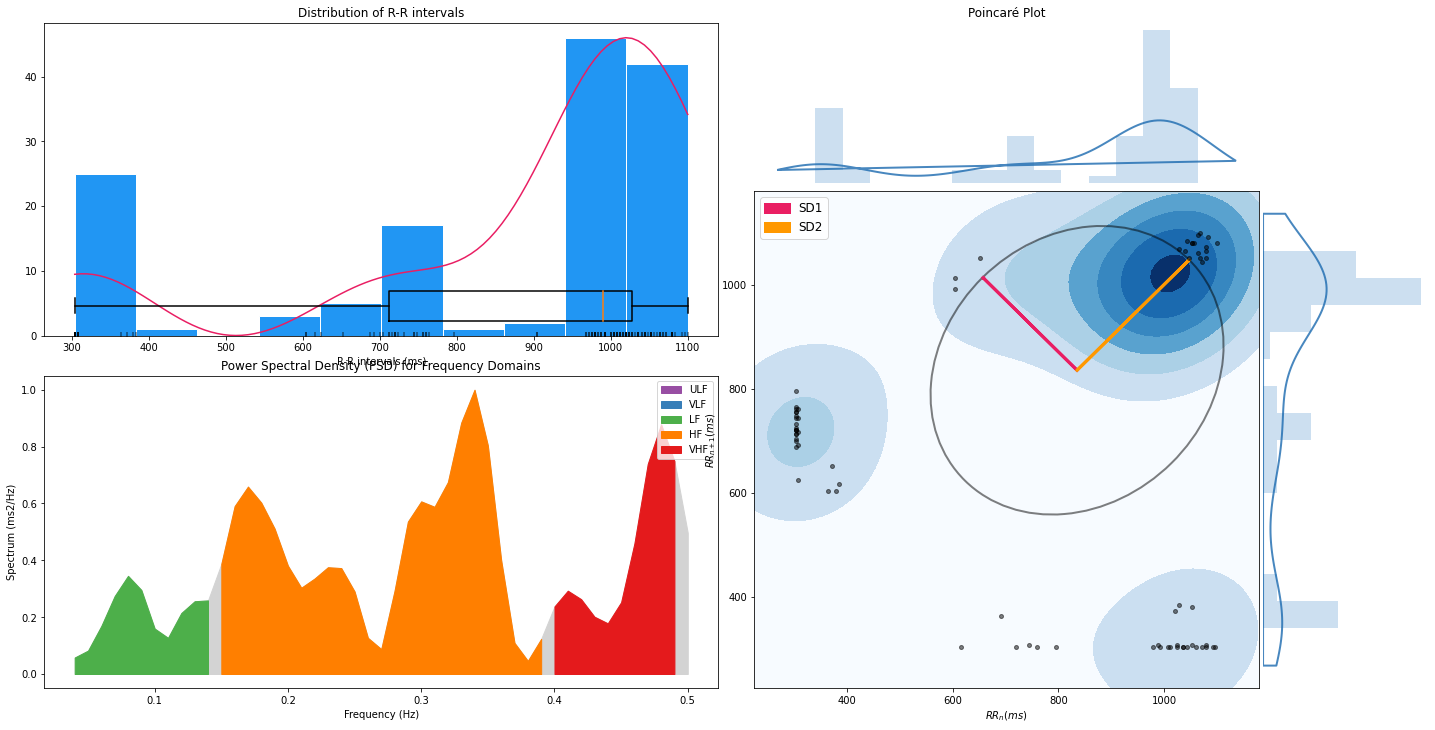

In [11]:
hrv_indices = nk.hrv(signals, sampling_rate=250, show=True)

In [12]:
nk.hrv(signals, sampling_rate=250)

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,835.408451,276.358056,NaN,NaN,NaN,NaN,NaN,NaN,355.075858,356.341362,...,0.706168,5.400951,0.86581,0.976821,1.050098,0.993645,1.06671,1.983907,4.372311,0.906306


In [182]:
np.std(HRV)

59.134375578000316

In [180]:
analyze_df = nk.ecg_analyze(signals, sampling_rate=250)

In [181]:
analyze_df

,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,79.95879,750.725,59.320041,NaN,NaN,NaN,NaN,NaN,NaN,46.173858,...,1.854938,5.587209,1.190206,1.505742,1.37735,1.896084,1.885135,1.831478,2.961492,0.777955


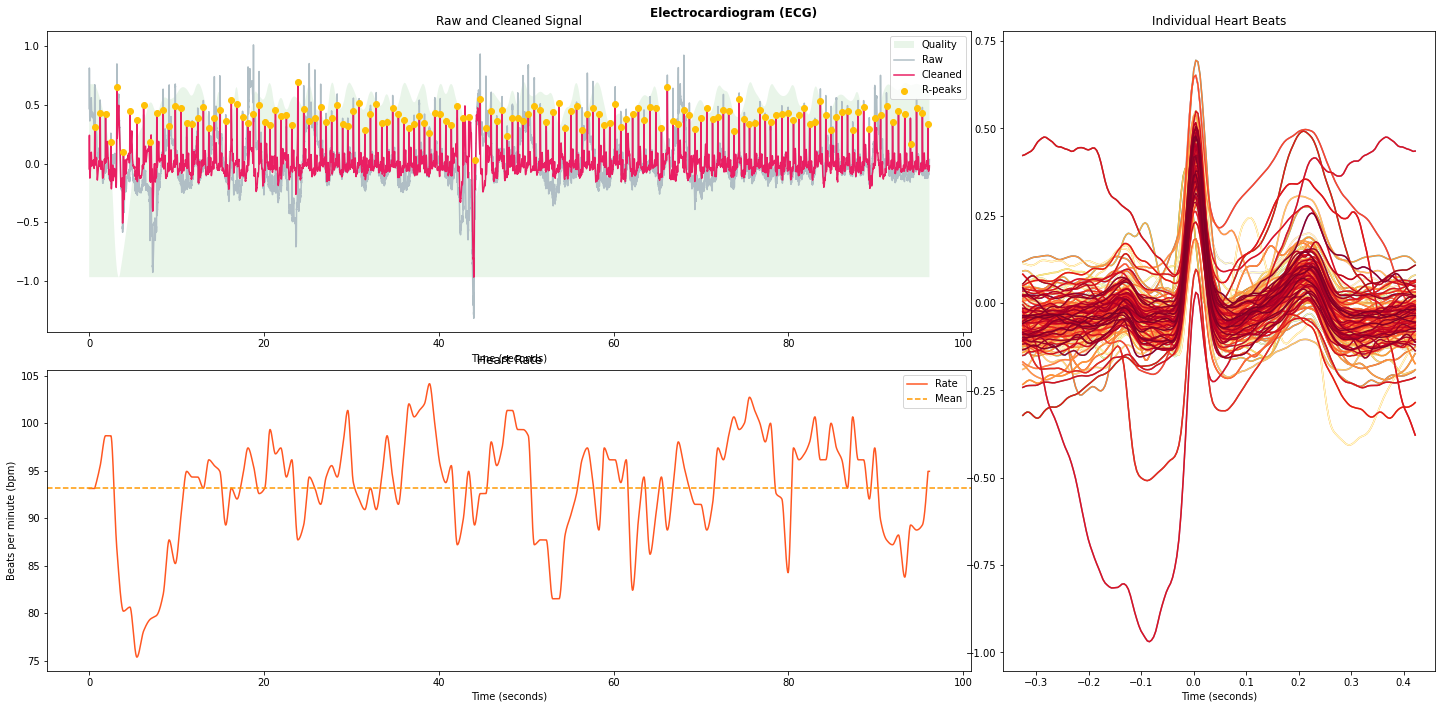

In [94]:
nk.ecg_plot(signals, sampling_rate=250)

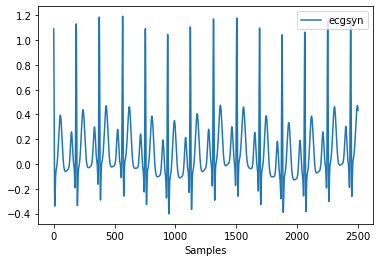

In [27]:
ecg1 = nk.ecg_simulate(duration=10,sampling_rate = 250,method="ecgsyn",heart_rate = 80)

nk.signal_plot(ecg1, labels="ecgsyn")

In [29]:
ecg1

array([1.09177901, 1.03068974, 0.87338478, ..., 0.45716652, 0.44701045,
       0.43462975])